# Rainfall Weather Forecasting is a classification Model

In [1]:
print(('*'*127))
print("                                                      Rainfall Weather Forecasting                                                                 ")
print(('*'*127))

*******************************************************************************************************************************
                                                      Rainfall Weather Forecasting                                                                 
*******************************************************************************************************************************


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn


from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 24)


df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0              W           44.0          W        WNW          20.0   
1            WNW           44.0        NNW        WSW           4.0   
2            WSW           46.0          W        WSW          19.0   
3             NE           24.0         SE          E          11.0   
4              W           41.0        ENE         NW           7.0   
...          ...            ...        ...        ...           ...   
8420           E           31.0         SE        ENE          13.0   
8421         NNW           22.0         SE          N          13.0   
8422           N           37.0         SE        WNW           9.0   
8423          SE           28.0        SSE          N          13.0   
8424         NaN            NaN        ESE        ESE          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
8420          11.0         51.0         24.0       1024.6       1020.3   
8421           9.0         56.0         21.0       1023.5       1019.1   
8422           9.0         53.0         24.0       1021.0       1016.8   
8423           7.0         51.0         24.0       1019.4       1016.5   
8424          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0          8.0       NaN     16.9     21.8        No           No  
1          NaN       NaN     17.2     24.3        No           No  
2          NaN       2.0     21.0     23.2        No           No  
3          NaN       NaN     18.1     26.5        No           No  
4          7.0       8.0     17.8     29.7        No           No  
...        ...       ...      ...      ...       ...          ...  
8420       NaN       NaN     10.1     22.4        No           No  
8421       NaN       NaN     10.9     24.5        No           No  
8422       NaN       NaN     12.5     26.1        No           No  
8423       3.0       2.0     15.1     26.0        No           No  
8424       8.0       8.0     15.0     20.9        No          NaN  

[8425 rows x 23 columns]

In [3]:
df.shape

(8425, 23)

* Here we that there is 8425 Rows and 23 Columns for this Dataset

In [4]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

* Here we observe that majority of the Columns are of float-type and RainTomorrow is our Target variable

In [5]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

* Since here we find many missing values missing value treatment is required

# Dataset Descirption

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time.

Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.

To work out the amount of rainfall, computer models and forecasters use 'precipitable water', which provides information about how much water vapour is available in the atmosphere for any approaching weather systems to draw in.


# Attributes

The following are the attributes in forcasting the weather:
																		
																					

* (1) Date - The day on which the the individual analysis was made

* (2) Location - The exact location place or town where the analysis was made

* (3) MinTemp - The Minimum temperature on that particular date

* (4) MaxTemp - The Maximum temperature on that particular date

* (5) Rainfall - The measurement of that particular rainfall on that particular date

* (6) Evaporation - The Rate of Evaporation on the particular region based on the heat levels

* (7) Sunshine - The Sunshine temperature levels on that particular day

* (8) WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight.

* (9) WindGustSpeed - The speed of the strongest wind gust in the 24 hours to midnight.

* (10) WindDir9am - The measurment of wind starting at 9am in the morning

* (11) WindDir3pm - The measurment of wind starting at 3pm in the afternoon

* (12) WindSpeed9am - The speed of wind starting at 9am in the morning

* (13) WindSpeed3pm - The speed of wind starting at 3pm in the afternoon

* (14) Humidity9am - The measurment of Humidity levels starting at 9am morning

* (15) Humidity3pm - The measurment of Humidity levels starting at 3pm afternoon

* (16) Pressure9am - The measurment of wind and rainfall pressure starting at 9am in the morning

* (17) Pressure3pm - The measurment of wind and rainfall pressure starting at 3pm in the afternoon

* (18) Cloud9am - The cloud density levels starting at 9am in the morning

* (19) Cloud3pm - The cloud density levels starting at 3pm in the morning

* (20) Temp9am - The measured temperature levels at 9am in in the morning

* (21) Temp3pm - The measured temperature levels at 3pm in in the afternoon

* (22) RainToday - This is the column where the data categorises wether or not it had rained today

* (23) RainTommrrow - This is the column where the data categorises wether or not it will rain tommorrow



# Data Cleaning

# Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()


df["RainTomorrow"] = lb.fit_transform(df["RainTomorrow"])
df["RainToday"] = lb.fit_transform(df["RainToday"])
df["Cloud9am"] = lb.fit_transform(df["Cloud9am"])
df["Cloud3pm"] = lb.fit_transform(df["Cloud3pm"])

In [7]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

# Missing Value Treatment

In [8]:
df['Temp3pm']=df['Temp3pm'].fillna(np.mean(df['Temp3pm'])) 
df['Temp9am']=df['Temp9am'].fillna(np.mean(df['Temp9am']))
df['Pressure3pm']=df['Pressure3pm'].fillna(np.mean(df['Pressure3pm']))
df['Pressure9am']=df['Pressure9am'].fillna(np.mean(df['Pressure9am']))
df['Humidity3pm']=df['Humidity3pm'].fillna(np.mean(df['Humidity3pm']))
df['Humidity9am']=df['Humidity9am'].fillna(np.mean(df['Humidity9am']))
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(np.mean(df['WindSpeed3pm']))
df['WindSpeed9am']=df['WindSpeed9am'].fillna(np.mean(df['WindSpeed9am']))
df['WindDir3pm']=df['WindDir3pm'].fillna(np.mean(df['WindDir3pm']))
df['WindDir9am']=df['WindDir9am'].fillna(np.mean(df['WindDir9am']))
df['WindGustSpeed']=df['WindGustSpeed'].fillna(np.mean(df['WindGustSpeed']))
df['WindGustDir']=df['WindGustDir'].fillna(np.mean(df['WindGustDir']))
df['Sunshine']=df['Sunshine'].fillna(np.mean(df['Sunshine']))
df['Evaporation']=df['Evaporation'].fillna(np.mean(df['Evaporation']))
df['Rainfall']=df['Rainfall'].fillna(np.mean(df['Rainfall']))
df['MaxTemp']=df['MaxTemp'].fillna(np.mean(df['MaxTemp']))
df['MinTemp']=df['MinTemp'].fillna(np.mean(df['MinTemp']))

# Checking VIF ( Variance Inflation Factor )

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif=pd.DataFrame()
    vif["F"] = df.columns
    vif["VIF_Value"] = [variance_inflation_factor(df.values, i)for i in range(df.shape[1])]
    return(vif)

F=df.iloc[:,:-1]
F.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   0.0       1.0     13.4     22.9       0.6     5.389395  7.632205   
1   1.0       1.0      7.4     25.1       0.0     5.389395  7.632205   
2   2.0       1.0     12.9     25.7       0.0     5.389395  7.632205   
3   3.0       1.0      9.2     28.0       0.0     5.389395  7.632205   
4   4.0       1.0     17.5     32.3       1.0     5.389395  7.632205   

   WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0         13.0           44.0        13.0        14.0          20.0   
1         14.0           44.0         6.0        15.0           4.0   
2         15.0           46.0        13.0        15.0          19.0   
3          4.0           24.0         9.0         0.0          11.0   
4         13.0           41.0         1.0         7.0           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1         8   
1          22.0         44.0         25.0       1010.6       1007.8         9   
2          26.0         38.0         30.0       1007.6       1008.7         9   
3           9.0         45.0         16.0       1017.6       1012.8         9   
4          20.0         82.0         33.0       1010.8       1006.0         7   

   Cloud3pm  Temp9am  Temp3pm  RainToday  
0         9     16.9     21.8          0  
1         9     17.2     24.3          0  
2         2     21.0     23.2          0  
3         9     18.1     26.5          0  
4         8     17.8     29.7          0

In [10]:
calculate_vif(F)

F      VIF_Value
0            Date       4.946685
1        Location       6.651465
2         MinTemp      57.098620
3         MaxTemp     424.276769
4        Rainfall       1.325480
5     Evaporation       3.559108
6        Sunshine      14.174656
7     WindGustDir       6.698399
8   WindGustSpeed      20.419805
9      WindDir9am       5.578901
10     WindDir3pm       6.239376
11   WindSpeed9am       5.932010
12   WindSpeed3pm       9.016093
13    Humidity9am      67.703872
14    Humidity3pm      48.243878
15    Pressure9am  521683.296332
16    Pressure3pm  521195.492878
17       Cloud9am       9.088022
18       Cloud3pm       9.029271
19        Temp9am     193.174222
20        Temp3pm     498.639538
21      RainToday       1.848042

* Here we observe that Pressure3pm, Pressure9am, MaxTemp, Temp3pm have High Correlation and Must be checked for Correlation

In [11]:
df.corr()

Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
Date           1.000000  0.475037  0.016931  0.102409  0.004945     0.153853   
Location       0.475037  1.000000  0.116531  0.064268  0.007693     0.143519   
MinTemp        0.016931  0.116531  1.000000  0.717522  0.087684     0.254965   
MaxTemp        0.102409  0.064268  0.717522  1.000000 -0.087451     0.322405   
Rainfall       0.004945  0.007693  0.087684 -0.087451  1.000000     0.023517   
Evaporation    0.153853  0.143519  0.254965  0.322405  0.023517     1.000000   
Sunshine       0.065101  0.057817  0.056184  0.378403 -0.169432     0.226001   
WindGustDir    0.002610 -0.021180 -0.156861 -0.236762  0.049958    -0.072234   
WindGustSpeed -0.037361  0.231396  0.230058  0.139998  0.086000     0.136371   
WindDir9am     0.024279 -0.050449 -0.088101 -0.245924  0.095107    -0.058219   
WindDir3pm    -0.009079 -0.028042 -0.144033 -0.177394  0.037966    -0.047889   
WindSpeed9am  -0.083943  0.221378  0.136872  0.013314  0.050631     0.104294   
WindSpeed3pm  -0.046362  0.231801  0.178349  0.088172  0.024791     0.101126   
Humidity9am    0.086328  0.005662 -0.130731 -0.390976  0.228800    -0.213108   
Humidity3pm   -0.038345  0.055790  0.079048 -0.421879  0.235444    -0.161661   
Pressure9am    0.030809 -0.032261 -0.429432 -0.325721 -0.072668    -0.177786   
Pressure3pm    0.013545 -0.020574 -0.422991 -0.403258 -0.033649    -0.189558   
Cloud9am       0.077397  0.028137 -0.031438 -0.212585  0.096211    -0.045263   
Cloud3pm       0.081702  0.002193 -0.080638 -0.213715  0.067324    -0.069464   
Temp9am        0.070703  0.118051  0.887119  0.866039 -0.007083     0.305264   
Temp3pm        0.113734  0.060570  0.685520  0.974506 -0.090687     0.315109   
RainToday      0.025062  0.029488  0.080321 -0.180840  0.381038    -0.091135   
RainTomorrow   0.027384  0.028247  0.107930 -0.115563  0.183200    -0.061642   

               Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
Date           0.065101     0.002610      -0.037361    0.024279   -0.009079   
Location       0.057817    -0.021180       0.231396   -0.050449   -0.028042   
MinTemp        0.056184    -0.156861       0.230058   -0.088101   -0.144033   
MaxTemp        0.378403    -0.236762       0.139998   -0.245924   -0.177394   
Rainfall      -0.169432     0.049958       0.086000    0.095107    0.037966   
Evaporation    0.226001    -0.072234       0.136371   -0.058219   -0.047889   
Sunshine       1.000000    -0.109562      -0.013778   -0.083901   -0.067804   
WindGustDir   -0.109562     1.000000       0.017559    0.404709    0.542701   
WindGustSpeed -0.013778     0.017559       1.000000   -0.124473    0.073409   
WindDir9am    -0.083901     0.404709      -0.124473    1.000000    0.266336   
WindDir3pm    -0.067804     0.542701       0.073409    0.266336    1.000000   
WindSpeed9am  -0.018069    -0.050563       0.600198   -0.075314    0.034125   
WindSpeed3pm   0.030145     0.044635       0.634939   -0.034768    0.081542   
Humidity9am   -0.360831     0.068504      -0.269593    0.102930   -0.016673   
Humidity3pm   -0.440268     0.079594      -0.091860    0.151840   -0.017021   
Pressure9am    0.021887    -0.119318      -0.407139    0.010917   -0.136652   
Pressure3pm   -0.035863    -0.031475      -0.372651    0.097374   -0.043466   
Cloud9am      -0.438410     0.137320      -0.026052    0.111636    0.087700   
Cloud3pm      -0.438490     0.110354      -0.002703    0.081826    0.057238   
Temp9am        0.250640    -0.187304       0.202298   -0.156612   -0.160987   
Temp3pm        0.395324    -0.250847       0.102199   -0.250499   -0.191650   
RainToday     -0.224152     0.131604       0.099803    0.149428    0.086080   
RainTomorrow  -0.311567     0.057037       0.189829    0.031804    0.009724   

               WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
Date              -0.083943     -0.046362     0.086328    -0.038345   
Location           0.221378      0.231801     0.005662     

* Since Pressure9am	, Pressure3pm have very high correlation values we remove them and between Temp3pm and Maxtemp we remove Temp3pm because Maxtemp has better correlation with target column also since we remove Temp3pm and Temp 9am too has high variance we remove it


In [12]:
df.drop(columns=['Pressure9am', 'Pressure3pm', 'Temp3pm', 'Temp9am'],axis=1,inplace=True)

# Outlier Check and Removal

In [13]:
df1 = df[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']]

In [14]:
df2 = df[['Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow','WindGustDir', 'WindGustSpeed']]

In [15]:
df3 = df[['WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm']]

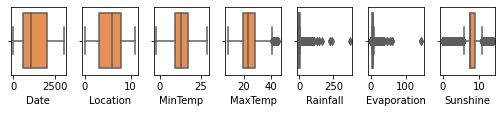

In [16]:
Columns = df1.columns.values
ncolumns = 20
nrows = 10
plt.figure(figsize=[20,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df1[Columns[i]], color='green', orient='H', palette='Oranges_r')
    plt.tight_layout()

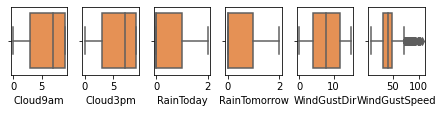

In [17]:
Columns = df2.columns.values
ncolumns = 20
nrows = 10
plt.figure(figsize=[20,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df2[Columns[i]], color='green', orient='H', palette='Oranges_r')
    plt.tight_layout()

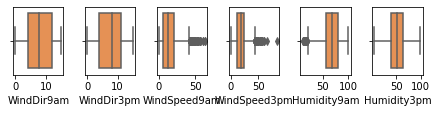

In [18]:
Columns = df3.columns.values
ncolumns = 20
nrows = 10
plt.figure(figsize=[20,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df3[Columns[i]], color='green', orient='H', palette='Oranges_r')
    plt.tight_layout()

In [19]:
from scipy.stats import zscore
import numpy as np
Z = np.abs(zscore(df))
Z.shape

(8425, 19)

In [20]:
threshold = 3
print(np.where(Z>3))
new_df = df[(Z<3).all(axis=1)]

(array([  14,   15,   44,   52,   52,   60,   61,   62,   62,   68,  123,
        267,  283,  284,  381,  381,  407,  431,  435,  436,  437,  438,
        443,  444,  452,  453,  455,  456,  462,  464,  465,  563,  611,
        612,  699,  713,  770,  796,  797,  802,  928,  928,  929,  935,
        949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
       1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
       1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
       1680, 1774, 1811, 1812, 1812, 1813, 1813, 1814, 1814, 1815, 1815,
       1816, 1816, 1817, 1817, 1818, 1819, 1873, 1898, 1903, 1945, 2016,
       2028, 2043, 2063, 2068, 2069, 2074, 2108, 2116, 2163, 2164, 2164,
       2165, 2165, 2166, 2166, 2167, 2186, 2198, 2199, 2199, 2200, 2201,
       2219, 2219, 2230, 2231, 2265, 2429, 2459, 2460, 2488, 2500, 2505,
       2505, 2506, 2527, 2541, 2593, 2676, 2677, 2678, 2679, 2735, 2824,
       2825, 2825, 2826, 2827, 2835, 2838, 2839, 2

In [21]:
new_df.shape

(7718, 19)

# DataLoss %

In [22]:
Loss = (8425/7718)/8425*100

In [23]:
Loss

0.012956724540036279

* Here we observe a Datasloss of 0.01% after the Outlier check adnd removal

# EDA

# Univariate Analysis

<AxesSubplot:xlabel='Date', ylabel='Density'>

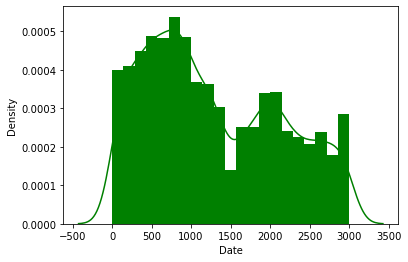

In [24]:
sn.distplot(new_df["Date"], hist_kws={'alpha':1}, color='g')

* Here we observe a good  distribution of data

<AxesSubplot:xlabel='Location', ylabel='Density'>

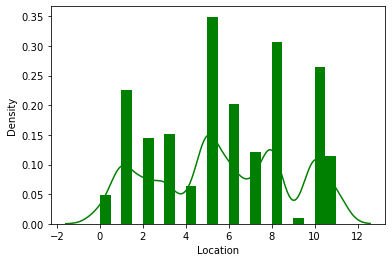

In [25]:
sn.distplot(new_df["Location"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

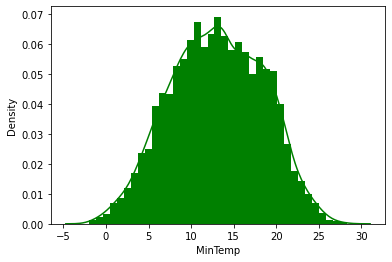

In [26]:
sn.distplot(new_df["MinTemp"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

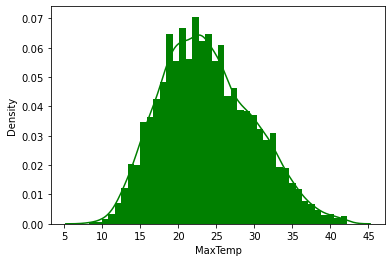

In [27]:
sn.distplot(new_df["MaxTemp"], hist_kws={'alpha':1}, color='g')

* Here we observe a good  distribution of data

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

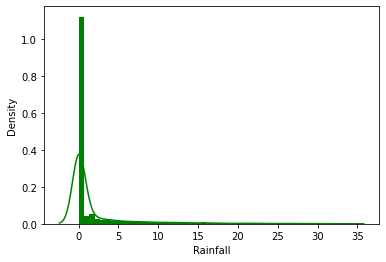

In [28]:
sn.distplot(new_df["Rainfall"], hist_kws={'alpha':1}, color='g')

* Here we observe highly skewed  distribution of data

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

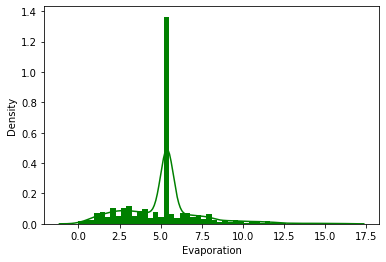

In [29]:
sn.distplot(new_df["Evaporation"], hist_kws={'alpha':1}, color='g')

* Here we observe moderately skewed  distribution of data

<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

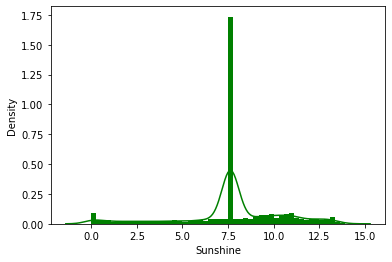

In [30]:
sn.distplot(new_df["Sunshine"], hist_kws={'alpha':1}, color='g')

* Here we observe moderately skewed  negative distribution of data

<AxesSubplot:xlabel='WindGustDir', ylabel='Density'>

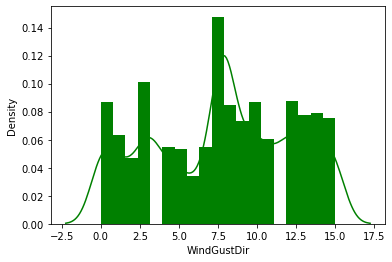

In [31]:
sn.distplot(new_df["WindGustDir"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

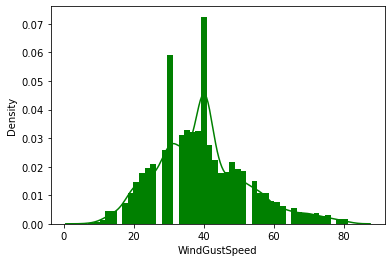

In [32]:
sn.distplot(new_df["WindGustSpeed"], hist_kws={'alpha':1}, color='g')

* Here we observe a good  distribution of data

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

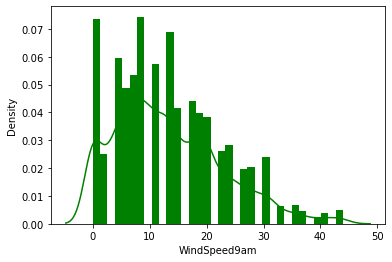

In [33]:
sn.distplot(new_df["WindSpeed9am"], hist_kws={'alpha':1}, color='g')

* Here we observe moderately skewed  distribution of data

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

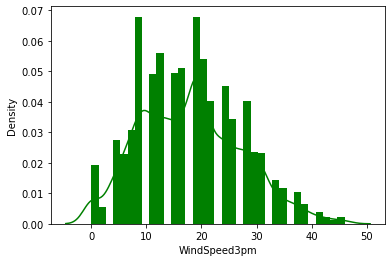

In [34]:
sn.distplot(new_df["WindSpeed3pm"], hist_kws={'alpha':1}, color='g')

* Here we observe a good  distribution of data

<AxesSubplot:xlabel='Humidity9am', ylabel='Density'>

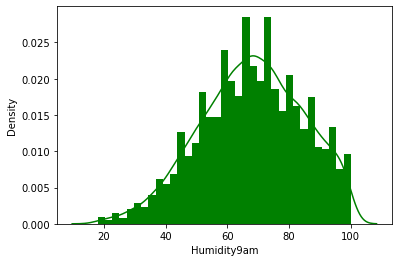

In [35]:
sn.distplot(new_df["Humidity9am"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='Humidity3pm', ylabel='Density'>

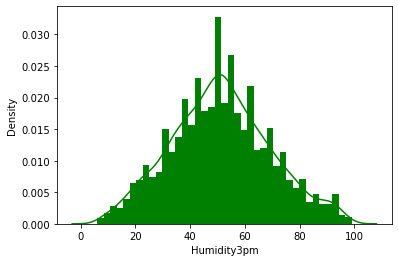

In [36]:
sn.distplot(new_df["Humidity3pm"], hist_kws={'alpha':1}, color='g')

* Here we observe a good  distribution of data

<AxesSubplot:xlabel='Cloud9am', ylabel='Density'>

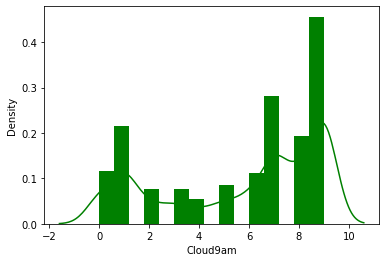

In [37]:
sn.distplot(new_df["Cloud9am"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='Cloud3pm', ylabel='Density'>

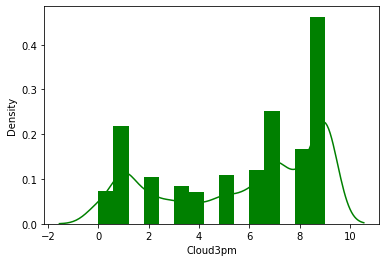

In [38]:
sn.distplot(new_df["Cloud3pm"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='RainToday', ylabel='Density'>

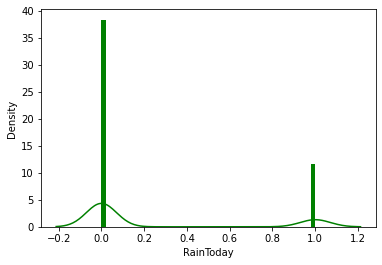

In [39]:
sn.distplot(new_df["RainToday"], hist_kws={'alpha':1}, color='g') 

* Here we observe highly skewed  distribution of data

<AxesSubplot:xlabel='RainTomorrow', ylabel='Density'>

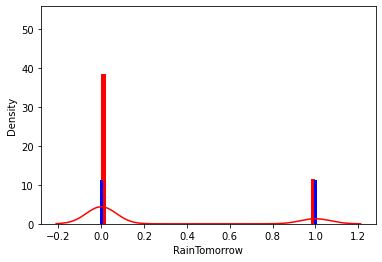

In [40]:
sn.distplot(new_df["RainTomorrow"], hist_kws={'alpha':1}, color='r', rug=True, rug_kws={"color": "b", "alpha": 0.5, "linewidth": 3, "height":0.2})

* Here we observe highly skewed  distribution of data

# Scatterplot

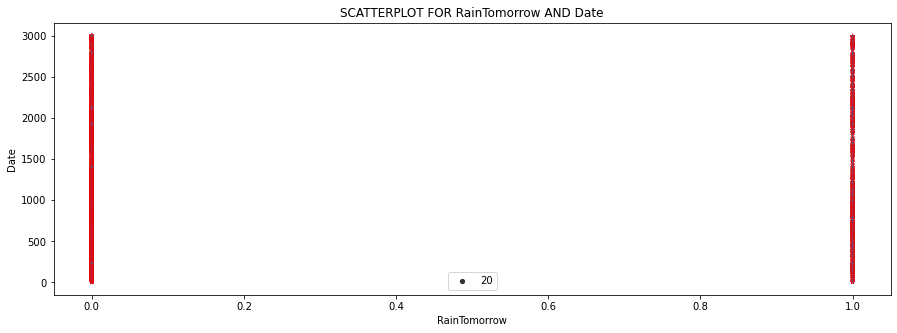

In [41]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Date')

sn.scatterplot(new_df['RainTomorrow'], new_df['Date'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe almost equal scattered data for both RainTomorrow report for all customerID Data

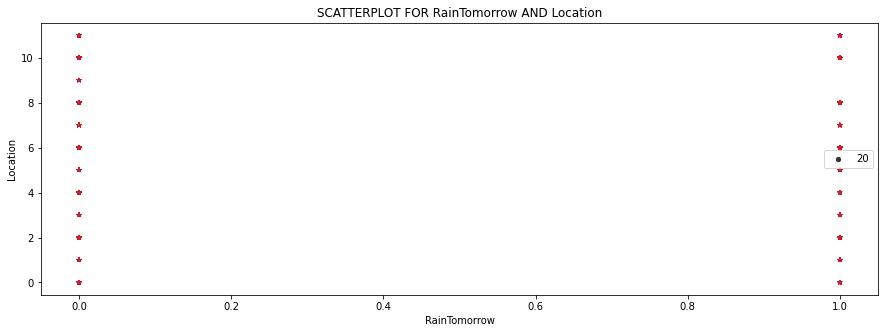

In [42]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Location')

sn.scatterplot(new_df['RainTomorrow'], new_df['Location'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all customerID Data

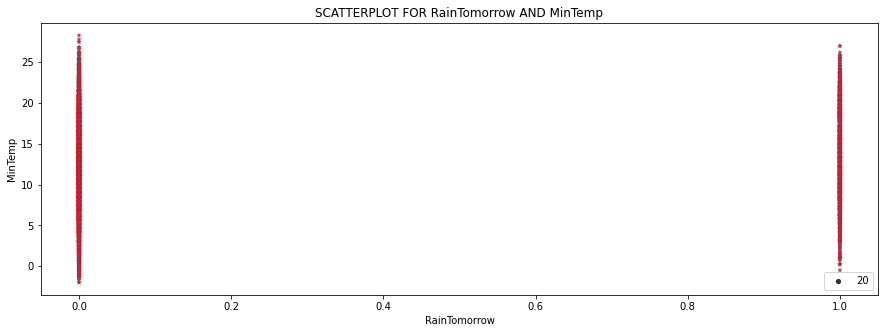

In [43]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND MinTemp')

sn.scatterplot(new_df['RainTomorrow'], new_df['MinTemp'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all MinTemp Data

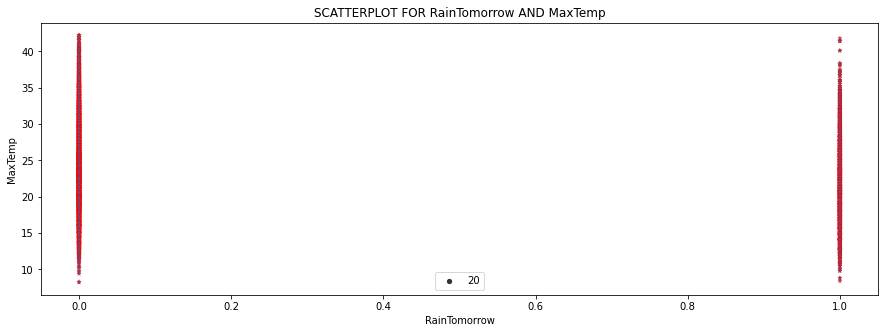

In [44]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND MaxTemp')

sn.scatterplot(new_df['RainTomorrow'], new_df['MaxTemp'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all MaxTemp Data

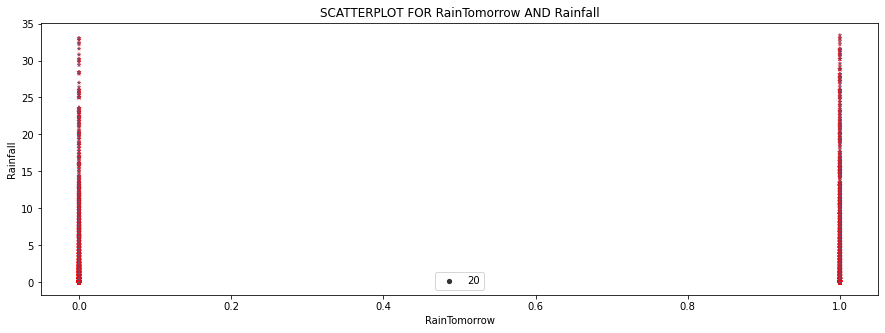

In [45]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Rainfall')

sn.scatterplot(new_df['RainTomorrow'], new_df['Rainfall'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for Yes RainTomorrow report for all Rainfall Data

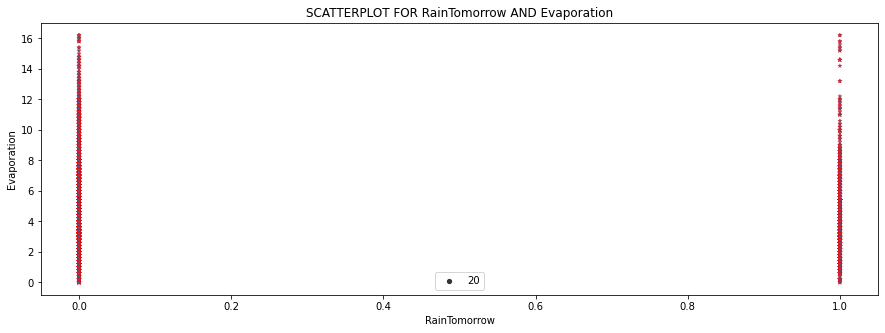

In [46]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Evaporation')

sn.scatterplot(new_df['RainTomorrow'], new_df['Evaporation'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all Evaporation Data

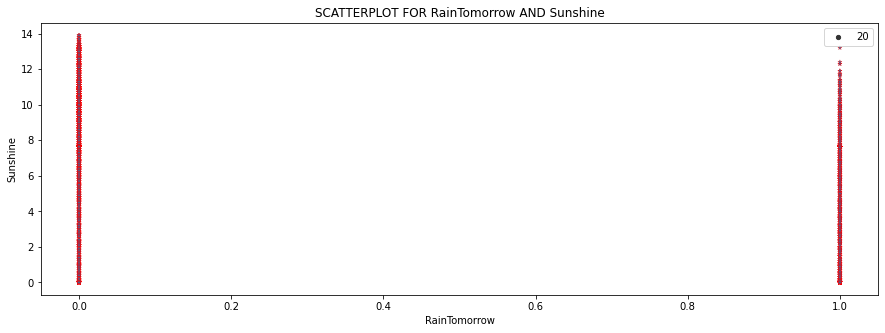

In [47]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Sunshine')

sn.scatterplot(new_df['RainTomorrow'], new_df['Sunshine'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all Sunshine Data

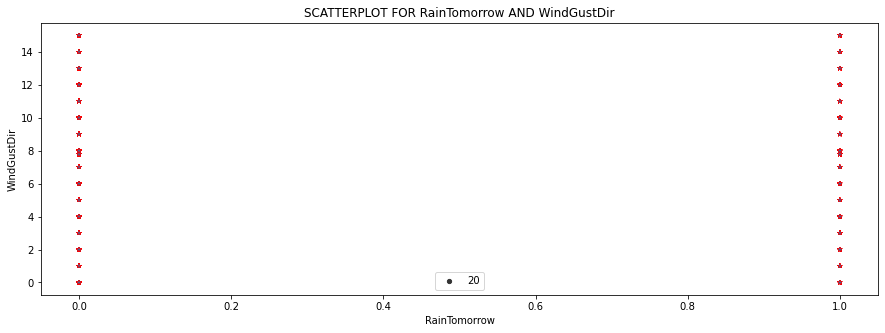

In [48]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND WindGustDir')

sn.scatterplot(new_df['RainTomorrow'], new_df['WindGustDir'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both RainTomorrow report for all WindGustDir Data

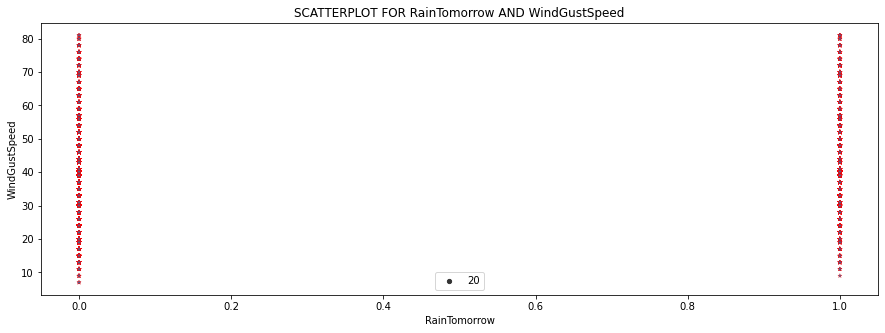

In [49]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND WindGustSpeed')

sn.scatterplot(new_df['RainTomorrow'], new_df['WindGustSpeed'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both RainTomorrow report for all WindGustSpeed Data

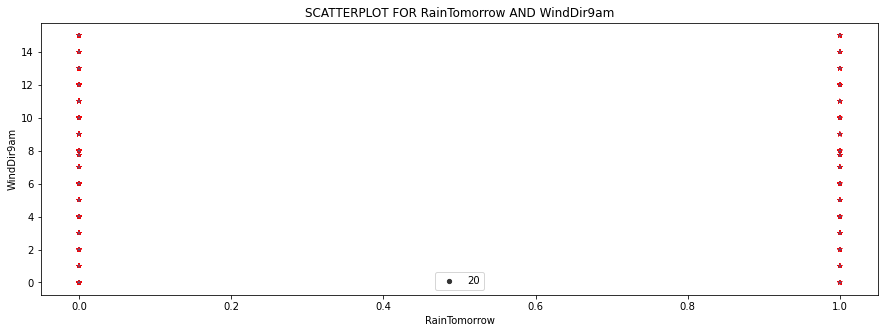

In [50]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND WindDir9am')

sn.scatterplot(new_df['RainTomorrow'], new_df['WindDir9am'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both RainTomorrow report for all WindDir9am Data

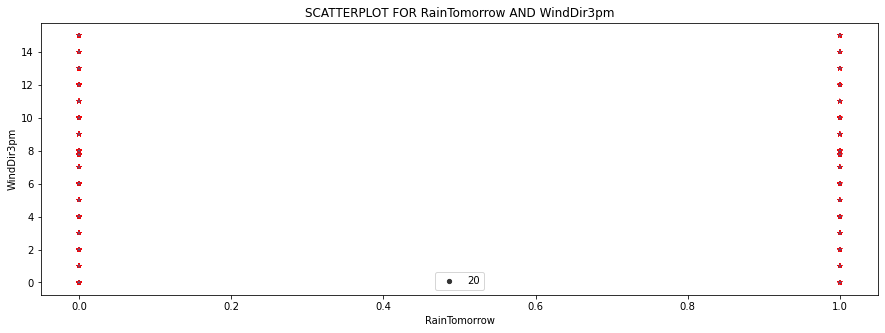

In [51]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND WindDir3pm')

sn.scatterplot(new_df['RainTomorrow'], new_df['WindDir3pm'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both RainTomorrow report for all WindDir3pm Data

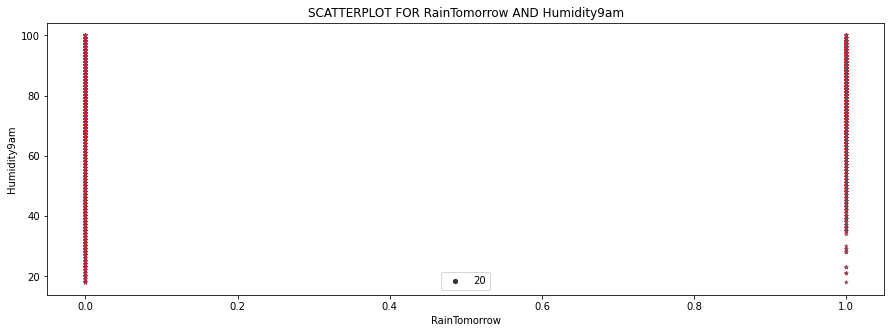

In [52]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Humidity9am')

sn.scatterplot(new_df['RainTomorrow'], new_df['Humidity9am'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all Humidity9am Data

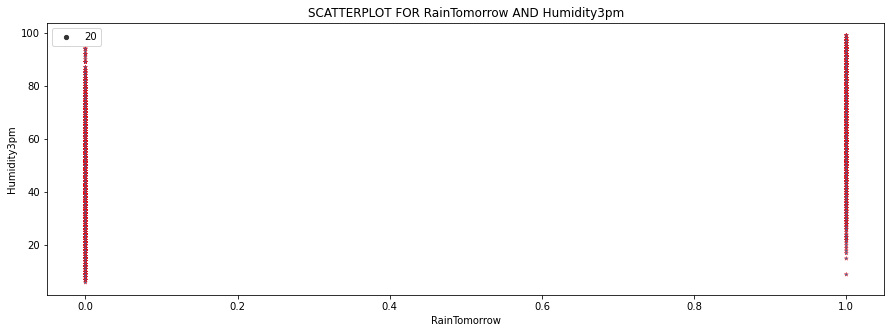

In [53]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Humidity3pm')

sn.scatterplot(new_df['RainTomorrow'], new_df['Humidity3pm'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all Humidity3pm Data

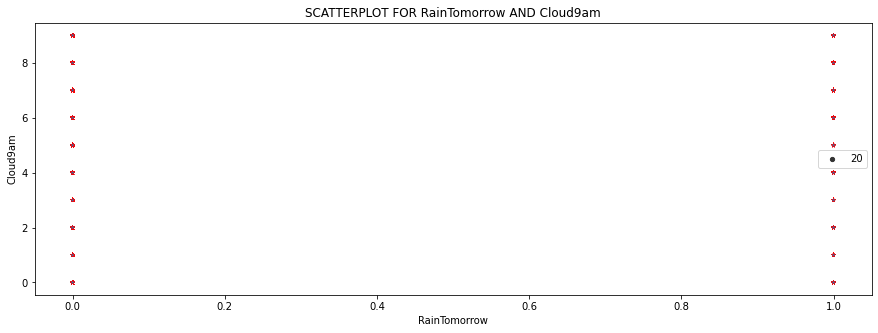

In [54]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Cloud9am')

sn.scatterplot(new_df['RainTomorrow'], new_df['Cloud9am'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all Cloud9am Data

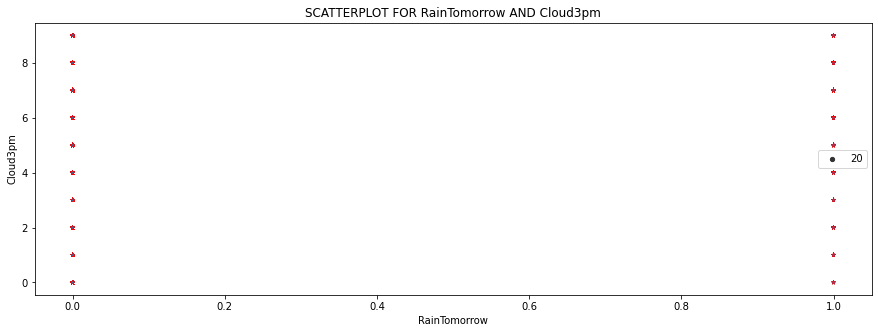

In [55]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Cloud3pm')

sn.scatterplot(new_df['RainTomorrow'], new_df['Cloud3pm'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all Cloud3pm Data

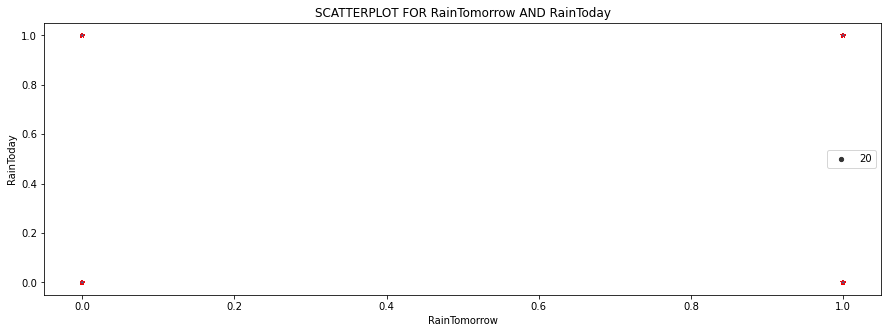

In [56]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND RainToday')

sn.scatterplot(new_df['RainTomorrow'], new_df['RainToday'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both RainTomorrow report for all RainToday Data

# Catplot

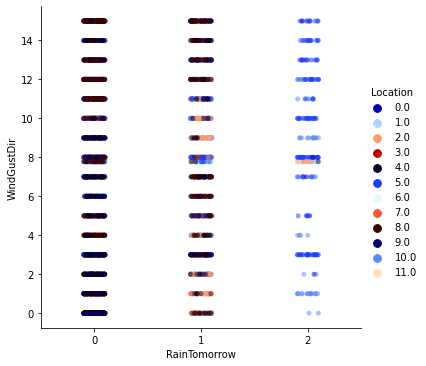

In [57]:
sn.catplot(x="RainTomorrow", y="WindGustDir", kind='strip',data=df, alpha=0.5, color='k', palette="flag_r", hue="Location")

* Here we observe that WindGustDir all categorical data has equal distribution of Rain tommorrow data on Yes on No data for the regions Albury Newcastle Williamtown Locations

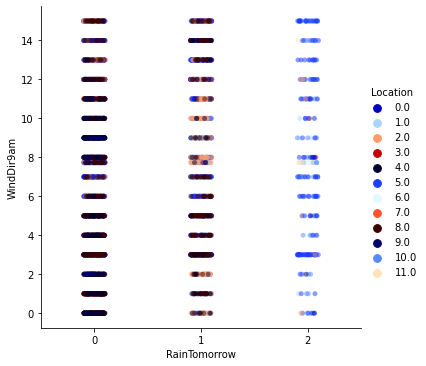

In [58]:
sn.catplot(x="RainTomorrow", y="WindDir9am", kind='strip',data=df, alpha=0.5, color='k', palette="flag_r", hue="Location")

* Here we observe that WindDir9am data SSW,NNE,SSE  has equal distribution of Rain tommorrow data on Yes on No data for the regions Albury Newcastle Williamtown Locations

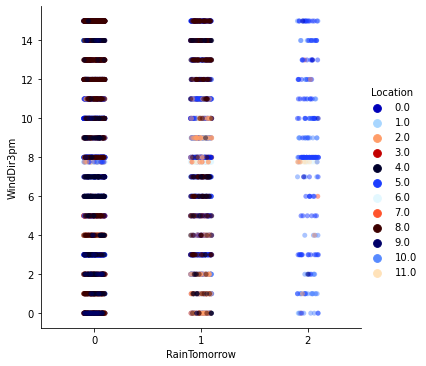

In [59]:
sn.catplot(x="RainTomorrow", y="WindDir3pm", kind='strip',data=df, alpha=0.5, color='k', palette="flag_r", hue="Location")

* Here we observe that WindDir3pm data SSW,NNE,SSE has equal distribution of Rain tommorrow data on Yes on No data for the regions Albury Newcastle Williamtown Locations

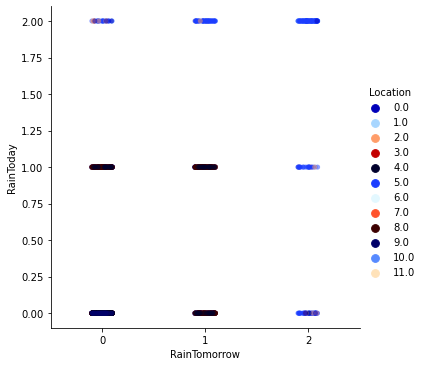

In [60]:
sn.catplot(x="RainTomorrow", y="RainToday", kind='strip',data=df, alpha=0.5, color='k', palette="flag_r", hue="Location")

* Here we observe that Rain today category having Yes are mostly found in Newcastle     Darwin      Williamtown        Locations On Yes categorical data of Rain Tommorrow

# Countplot

<AxesSubplot:xlabel='count', ylabel='MinTemp'>

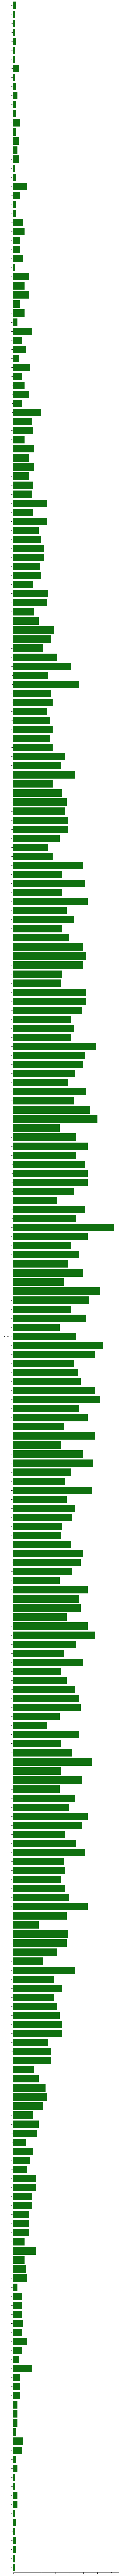

In [61]:
plt.figure(figsize=(20,500))

sn.countplot(y=new_df['MinTemp'], data=new_df, color='g')

* Here we observe that highest value count for MinTemp is 12.0

<AxesSubplot:xlabel='count', ylabel='MaxTemp'>

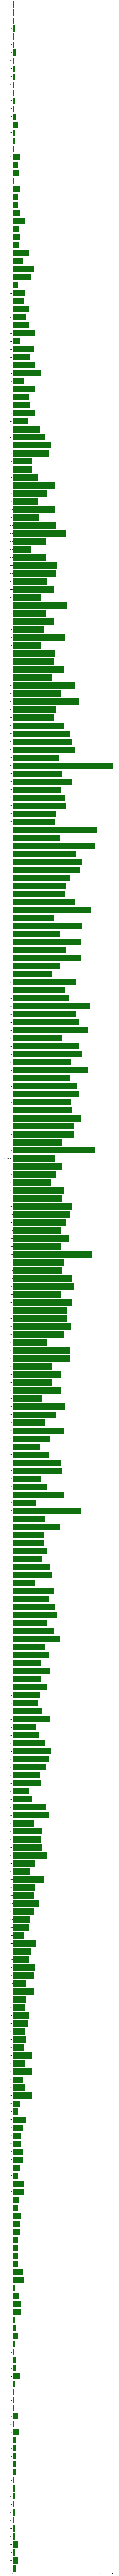

In [62]:
plt.figure(figsize=(20,500))

sn.countplot(y=new_df['MaxTemp'], data=new_df, color='g')

* Here we observe that highest value count for MaxTemp is 19.0

<AxesSubplot:xlabel='count', ylabel='Rainfall'>

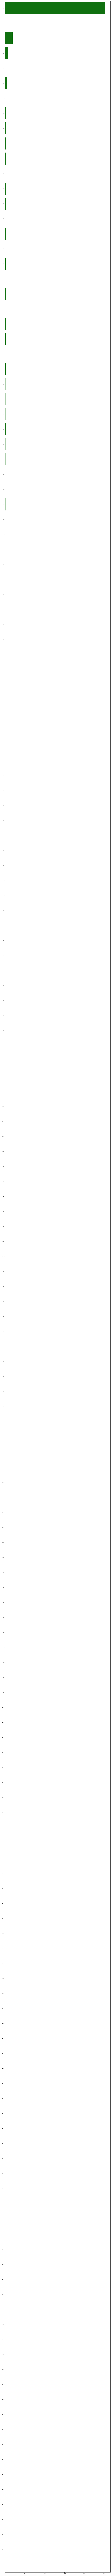

In [63]:
plt.figure(figsize=(20,500))

sn.countplot(y=new_df['Rainfall'], data=new_df, color='g')

* Here we observe that highest value count for Rainfall is 0.2 keeping the Null value 0 as assumption

<AxesSubplot:xlabel='count', ylabel='Evaporation'>

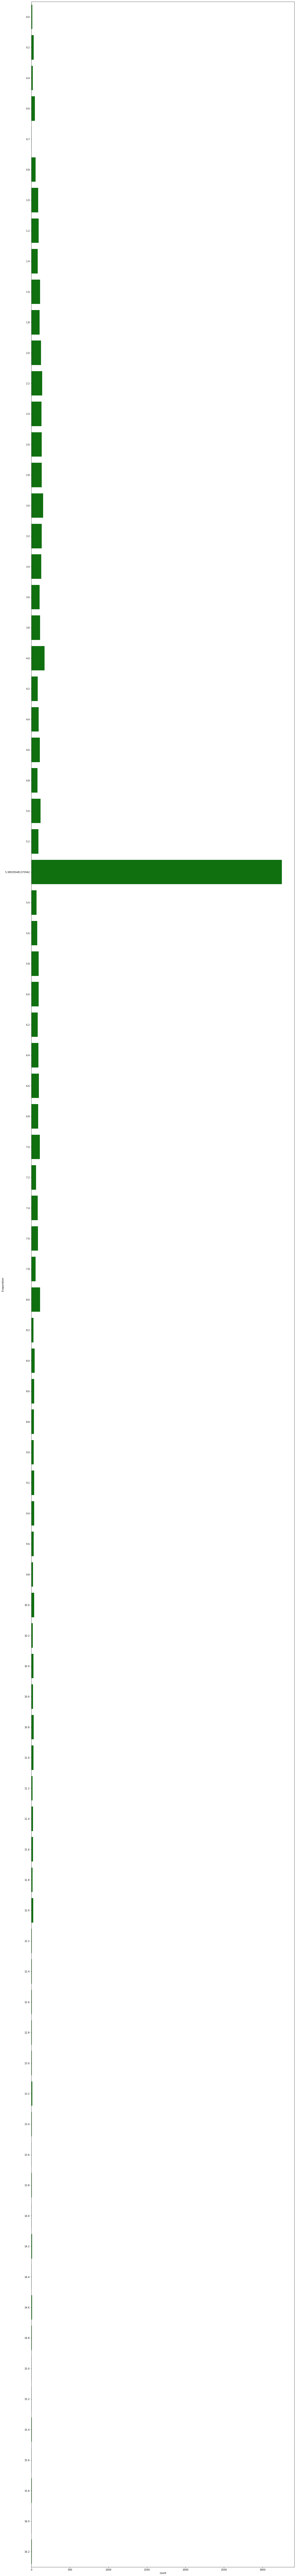

In [64]:
plt.figure(figsize=(20,200))

sn.countplot(y=new_df['Evaporation'], data=new_df, color='g')

* Here we observe that highest value count for Evaporation is 5.3

<AxesSubplot:xlabel='count', ylabel='WindGustSpeed'>

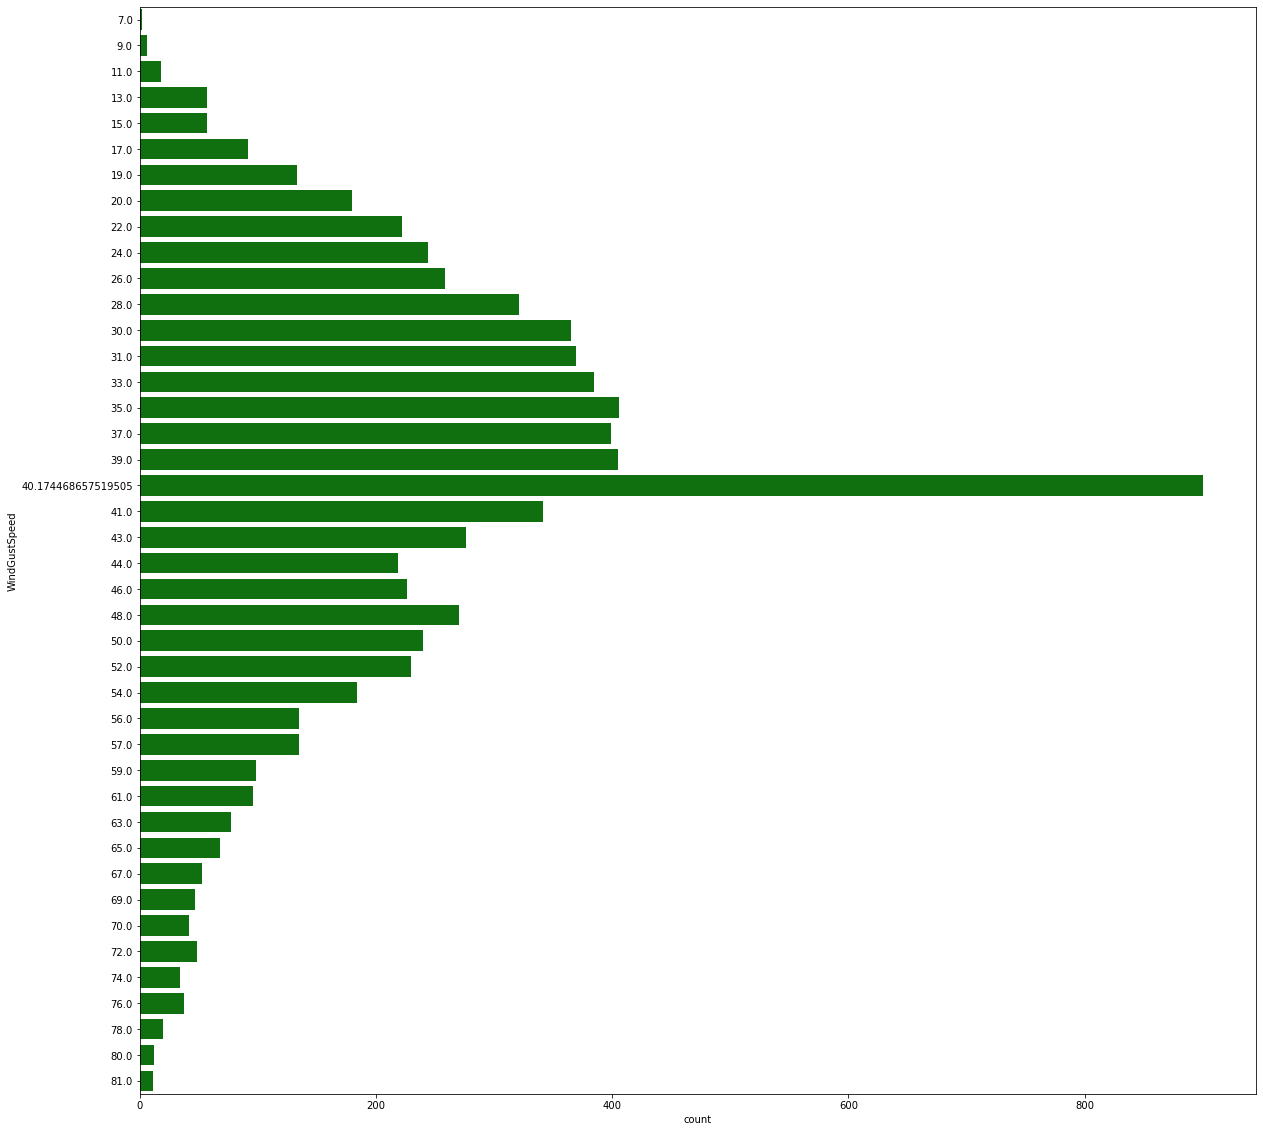

In [65]:
plt.figure(figsize=(20,20))

sn.countplot(y=new_df['WindGustSpeed'], data=new_df, color='g')

* Here we observe that highest value count for WindGustSpeed is 40.1

<AxesSubplot:xlabel='count', ylabel='WindSpeed9am'>

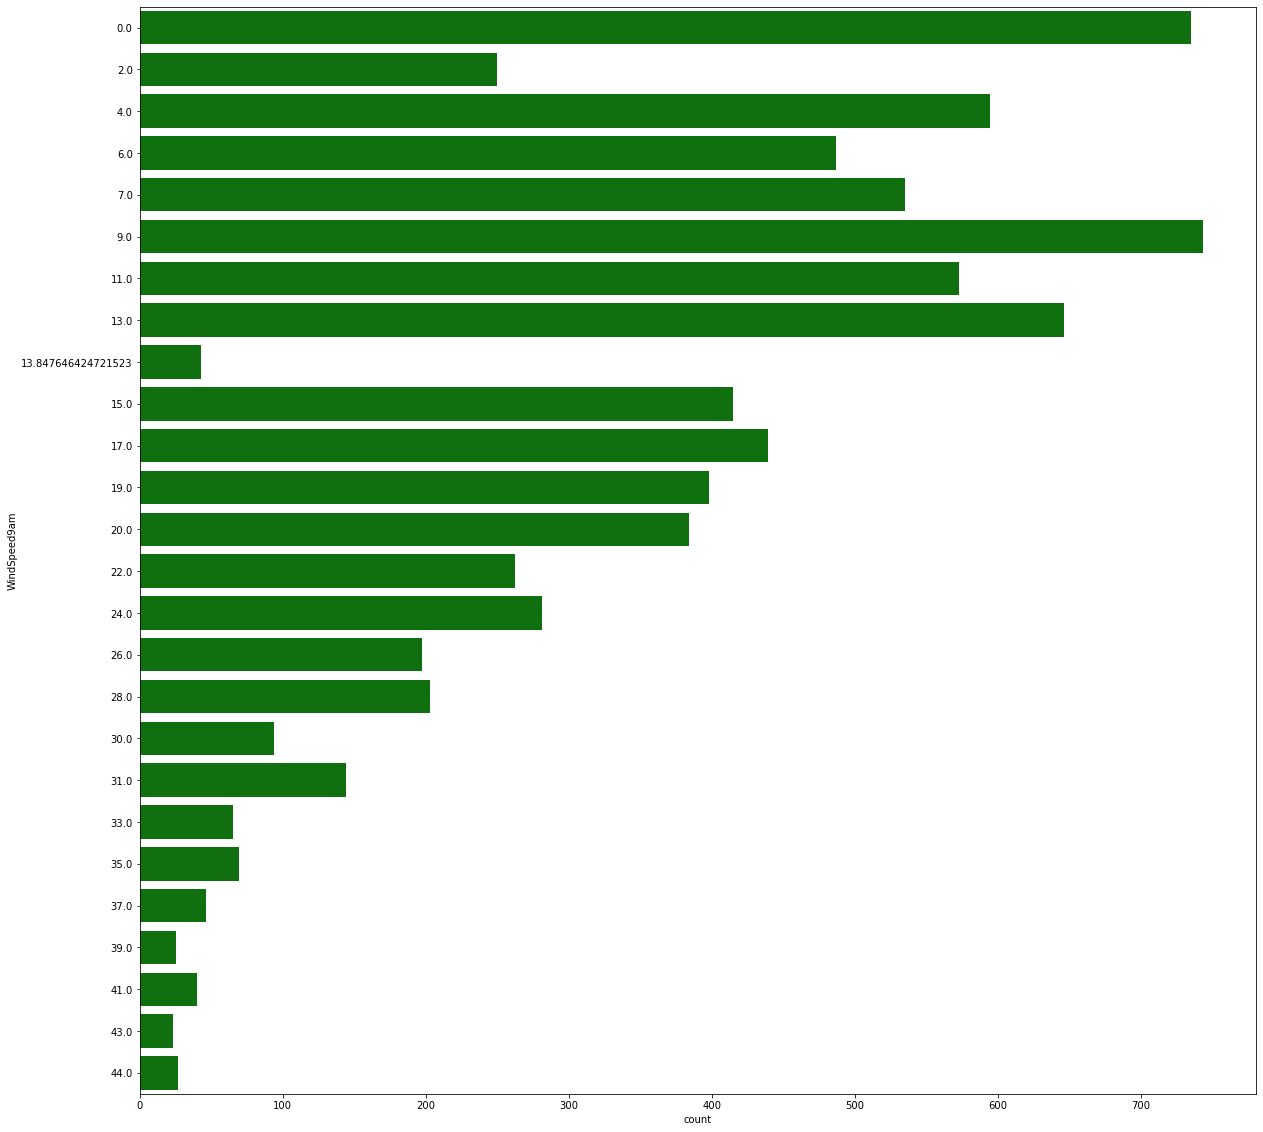

In [66]:
plt.figure(figsize=(20,20))

sn.countplot(y=new_df['WindSpeed9am'], data=new_df, color='g')

* Here we observe that highest value count for WindSpeed9am is 9.0

<AxesSubplot:xlabel='count', ylabel='WindSpeed3pm'>

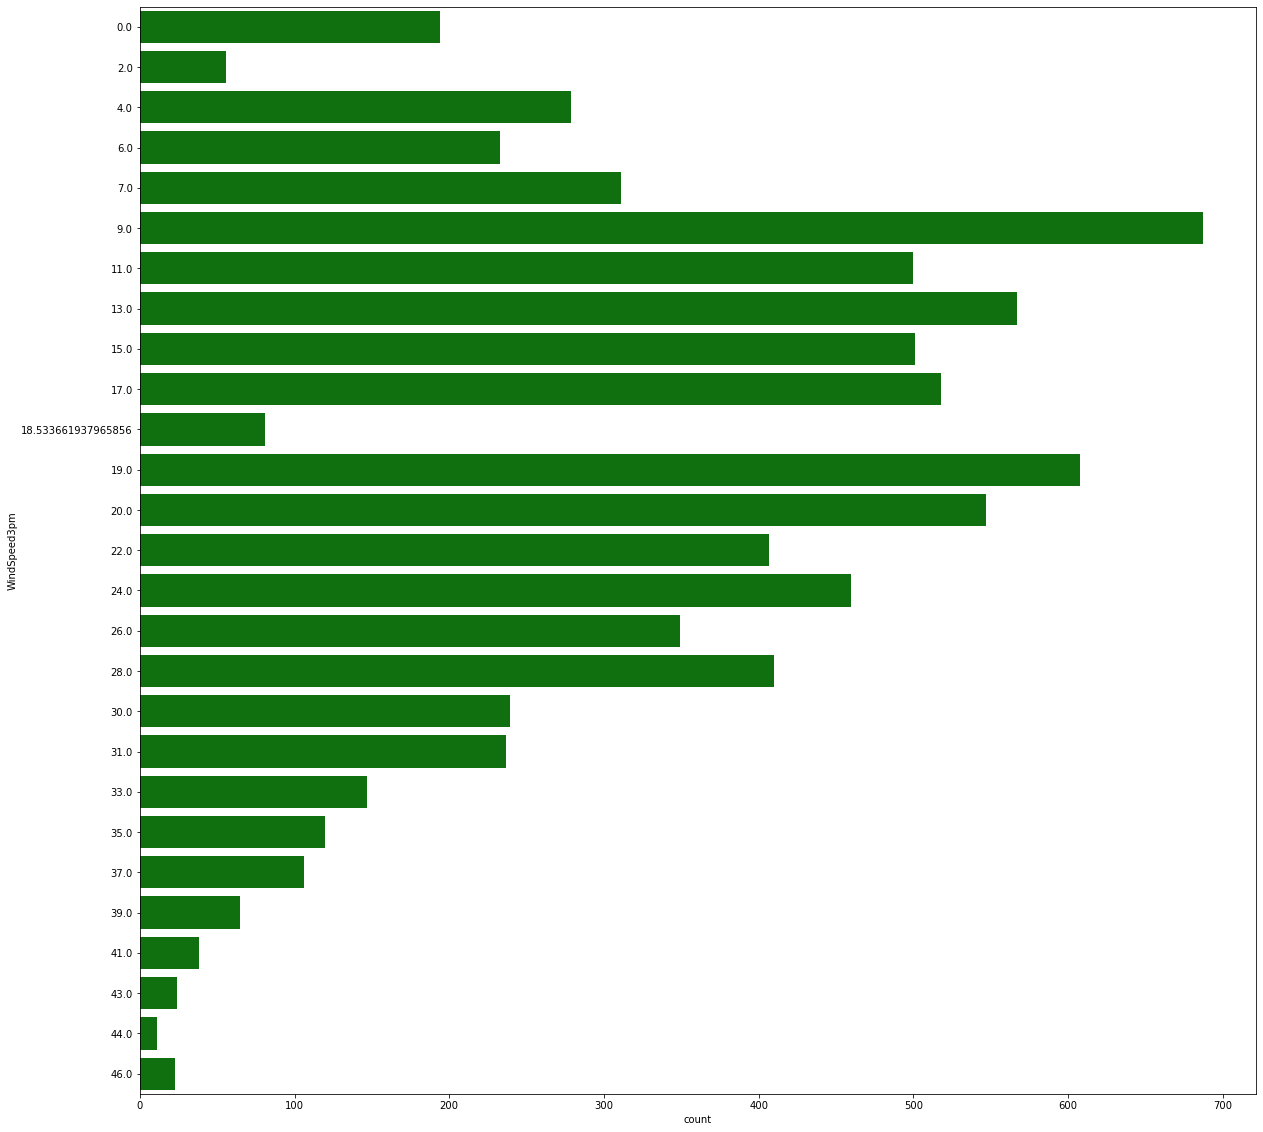

In [67]:
plt.figure(figsize=(20,20))

sn.countplot(y=new_df['WindSpeed3pm'], data=new_df, color='g')

* Here we observe that highest value count for WindSpeed3pm is 9.0

<AxesSubplot:xlabel='count', ylabel='Humidity9am'>

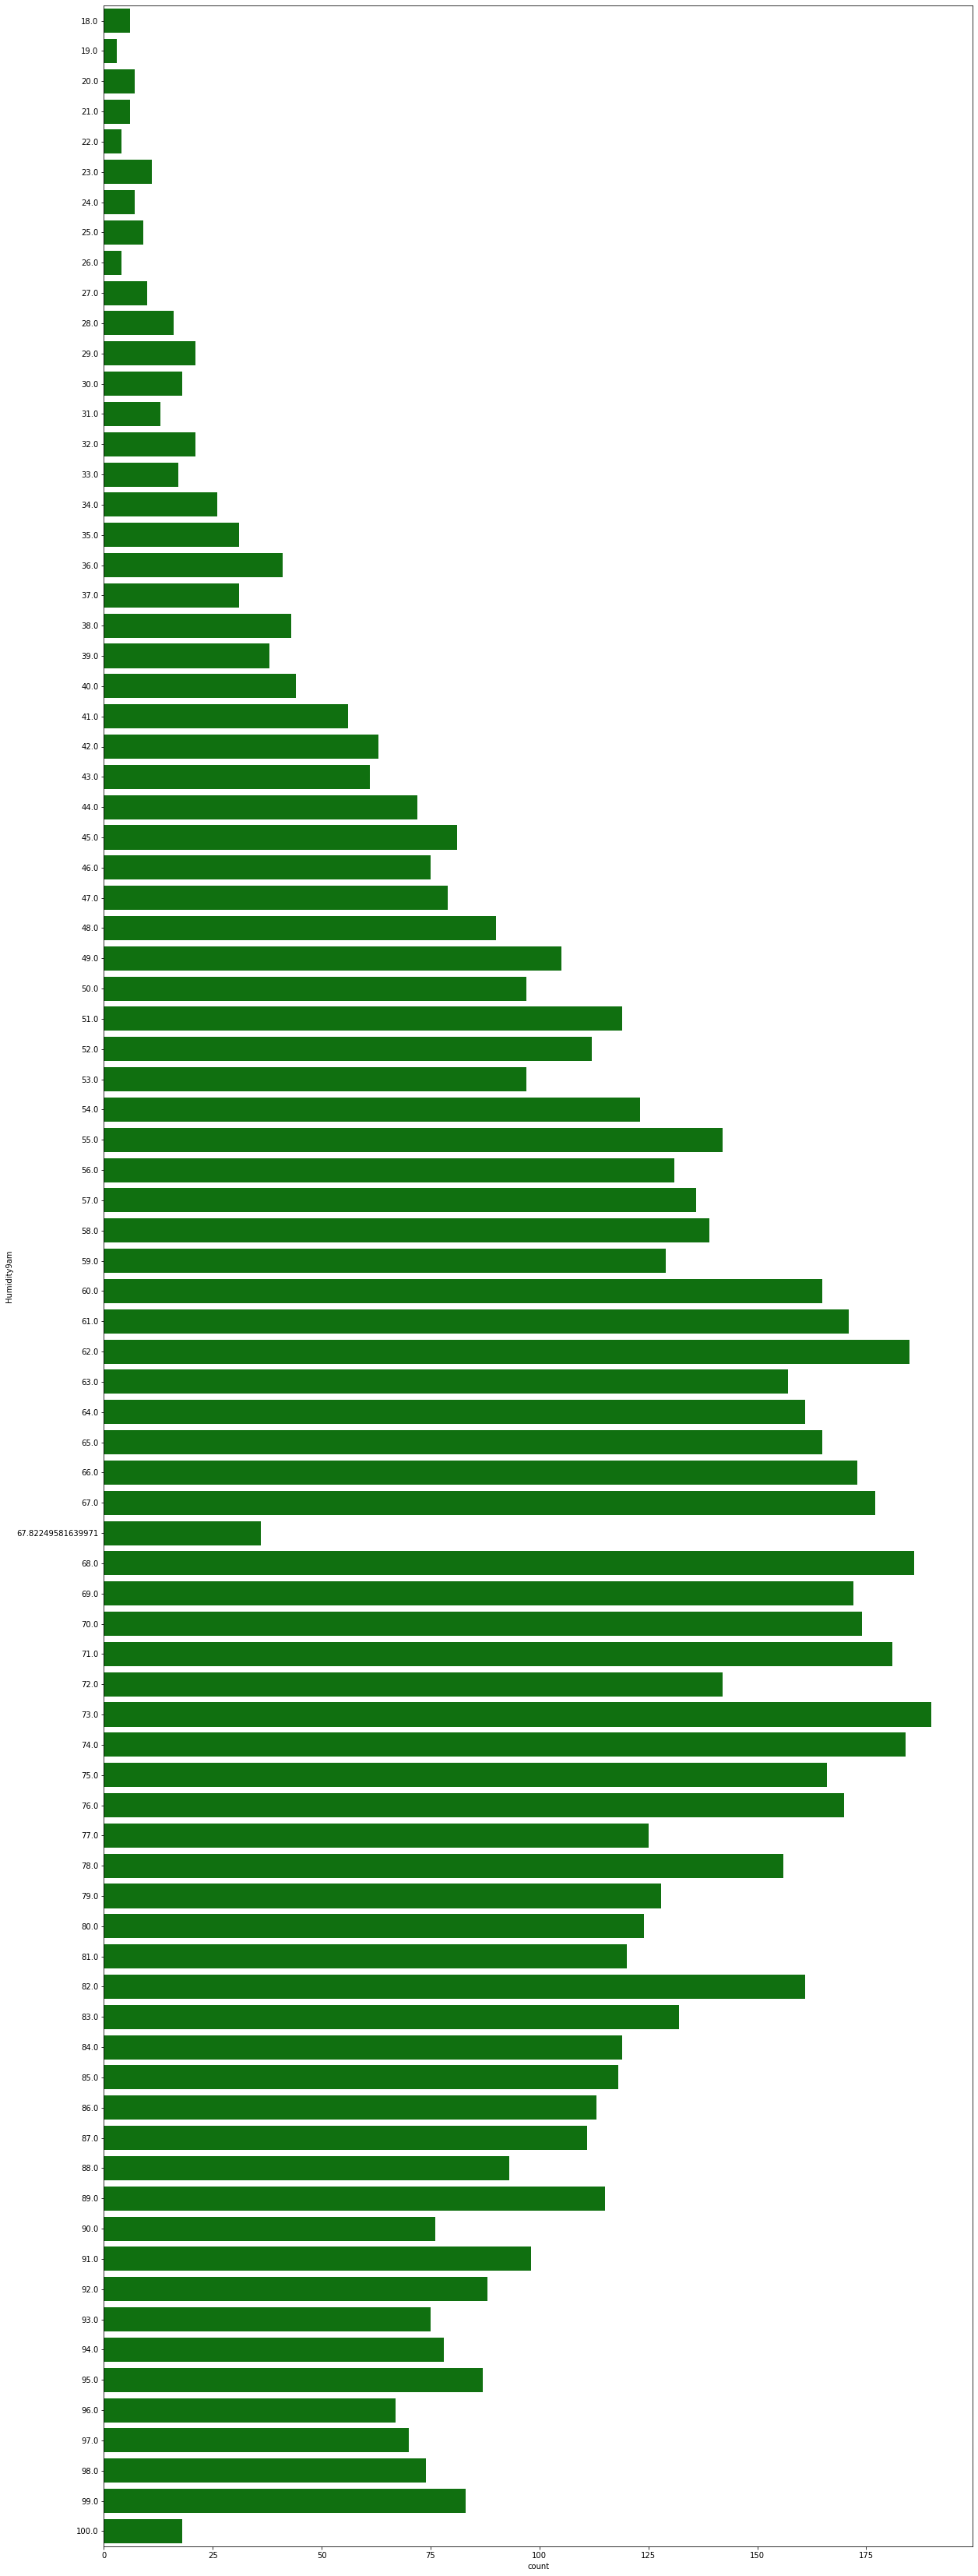

In [68]:
plt.figure(figsize=(20,60))

sn.countplot(y=new_df['Humidity9am'], data=new_df, color='g')

* Here we observe that highest value count for WindSpeed3pm is 72.0

<AxesSubplot:xlabel='count', ylabel='Humidity3pm'>

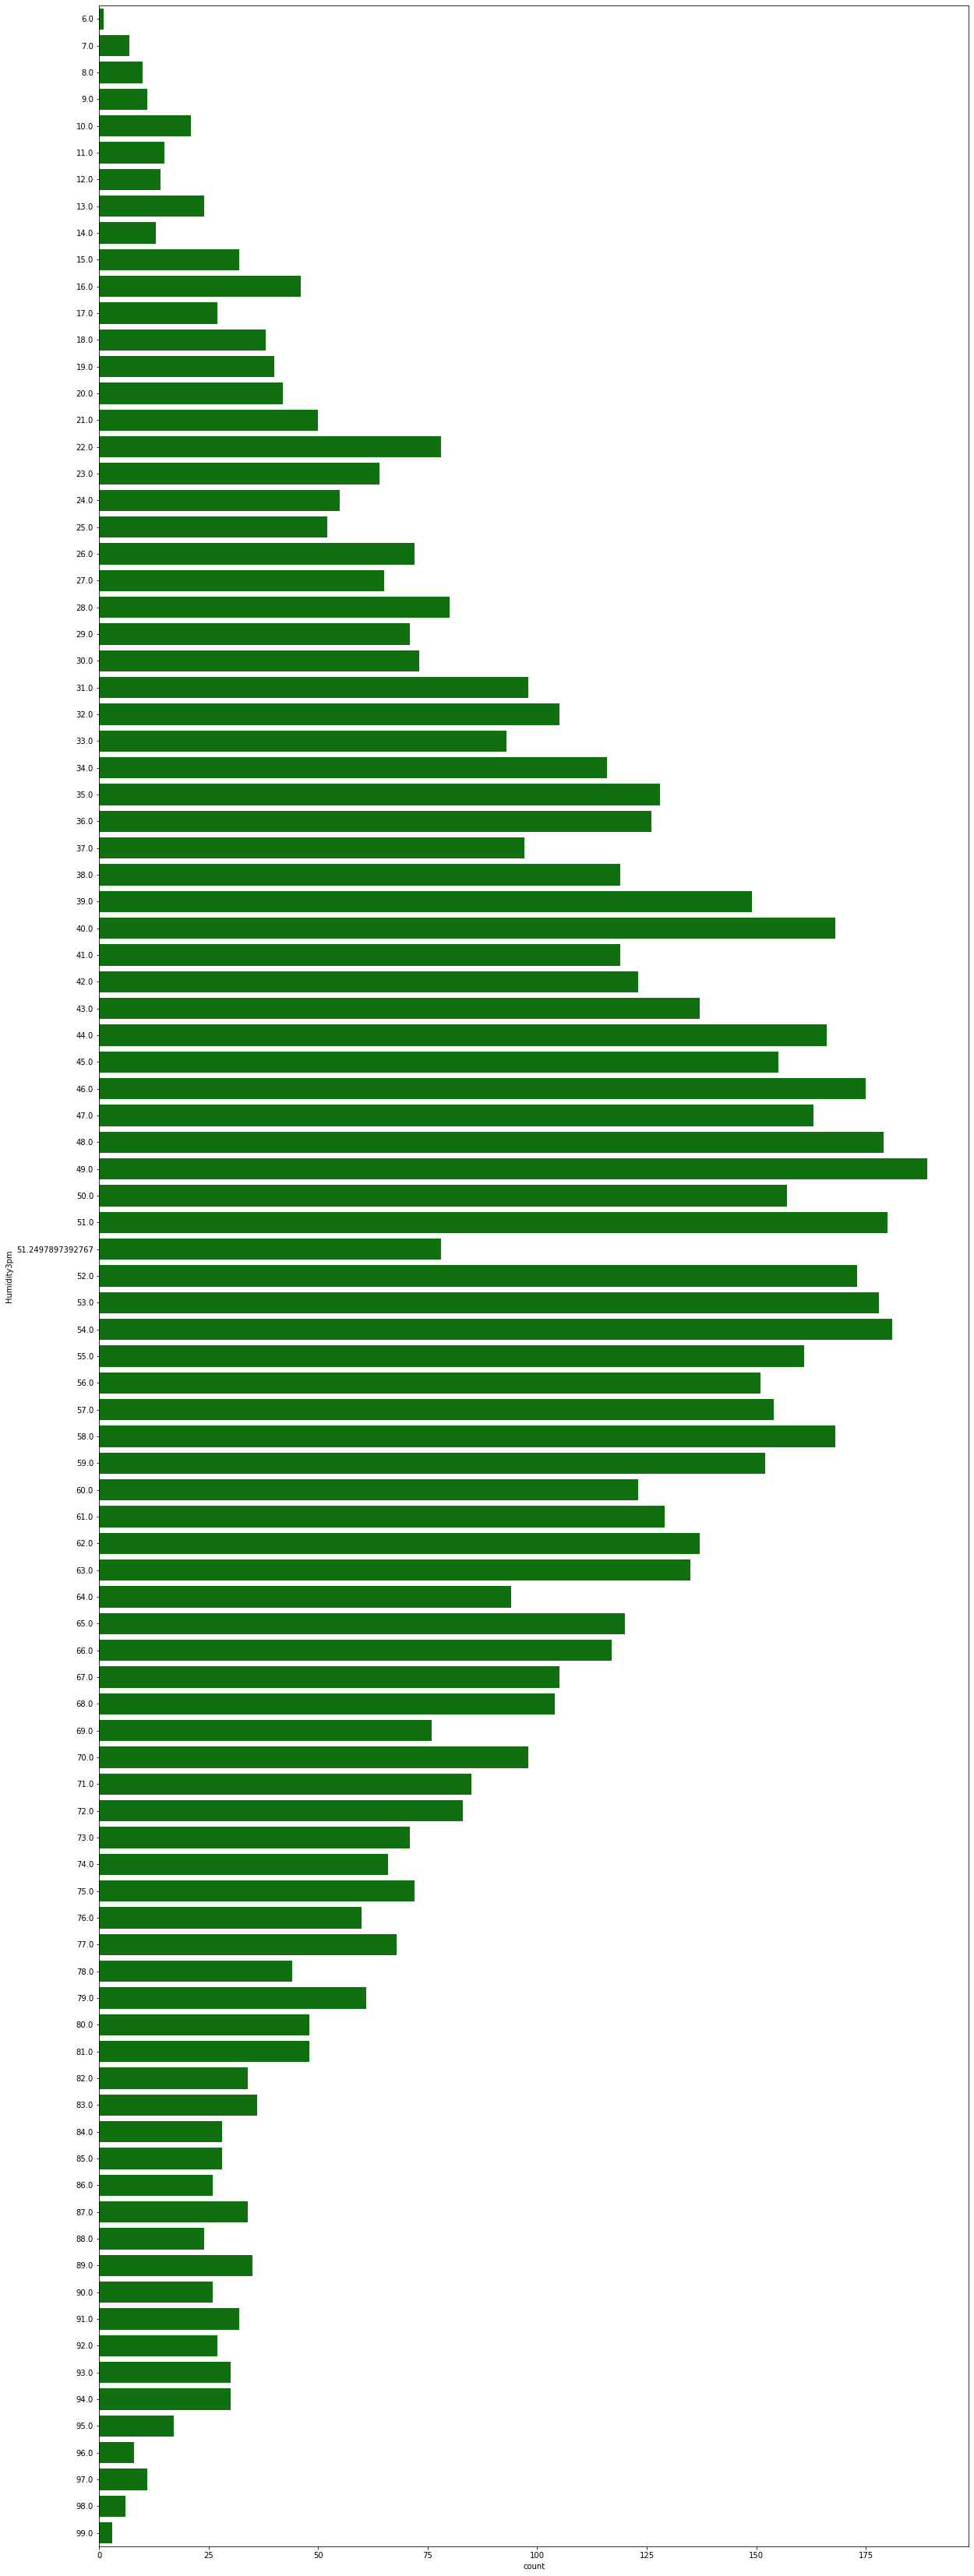

In [69]:
plt.figure(figsize=(20,60))

sn.countplot(y=new_df['Humidity3pm'], data=new_df, color='g')

* Here we observe that highest value count for Humidity3pm is 49.0

<AxesSubplot:xlabel='count', ylabel='Cloud9am'>

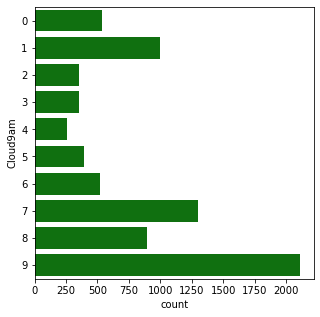

In [70]:
plt.figure(figsize=(5,5))

sn.countplot(y=new_df['Cloud9am'], data=new_df, color='g')

* Here we observe that highest value count for Cloud9am is 9

<AxesSubplot:xlabel='count', ylabel='Cloud3pm'>

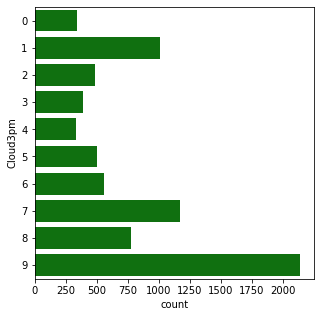

In [71]:
plt.figure(figsize=(5,5))

sn.countplot(y=new_df['Cloud3pm'], data=new_df, color='g')

* Here we observe that highest value count for Cloud3pm is 9

# BiVariate Analysis

# Pairplot

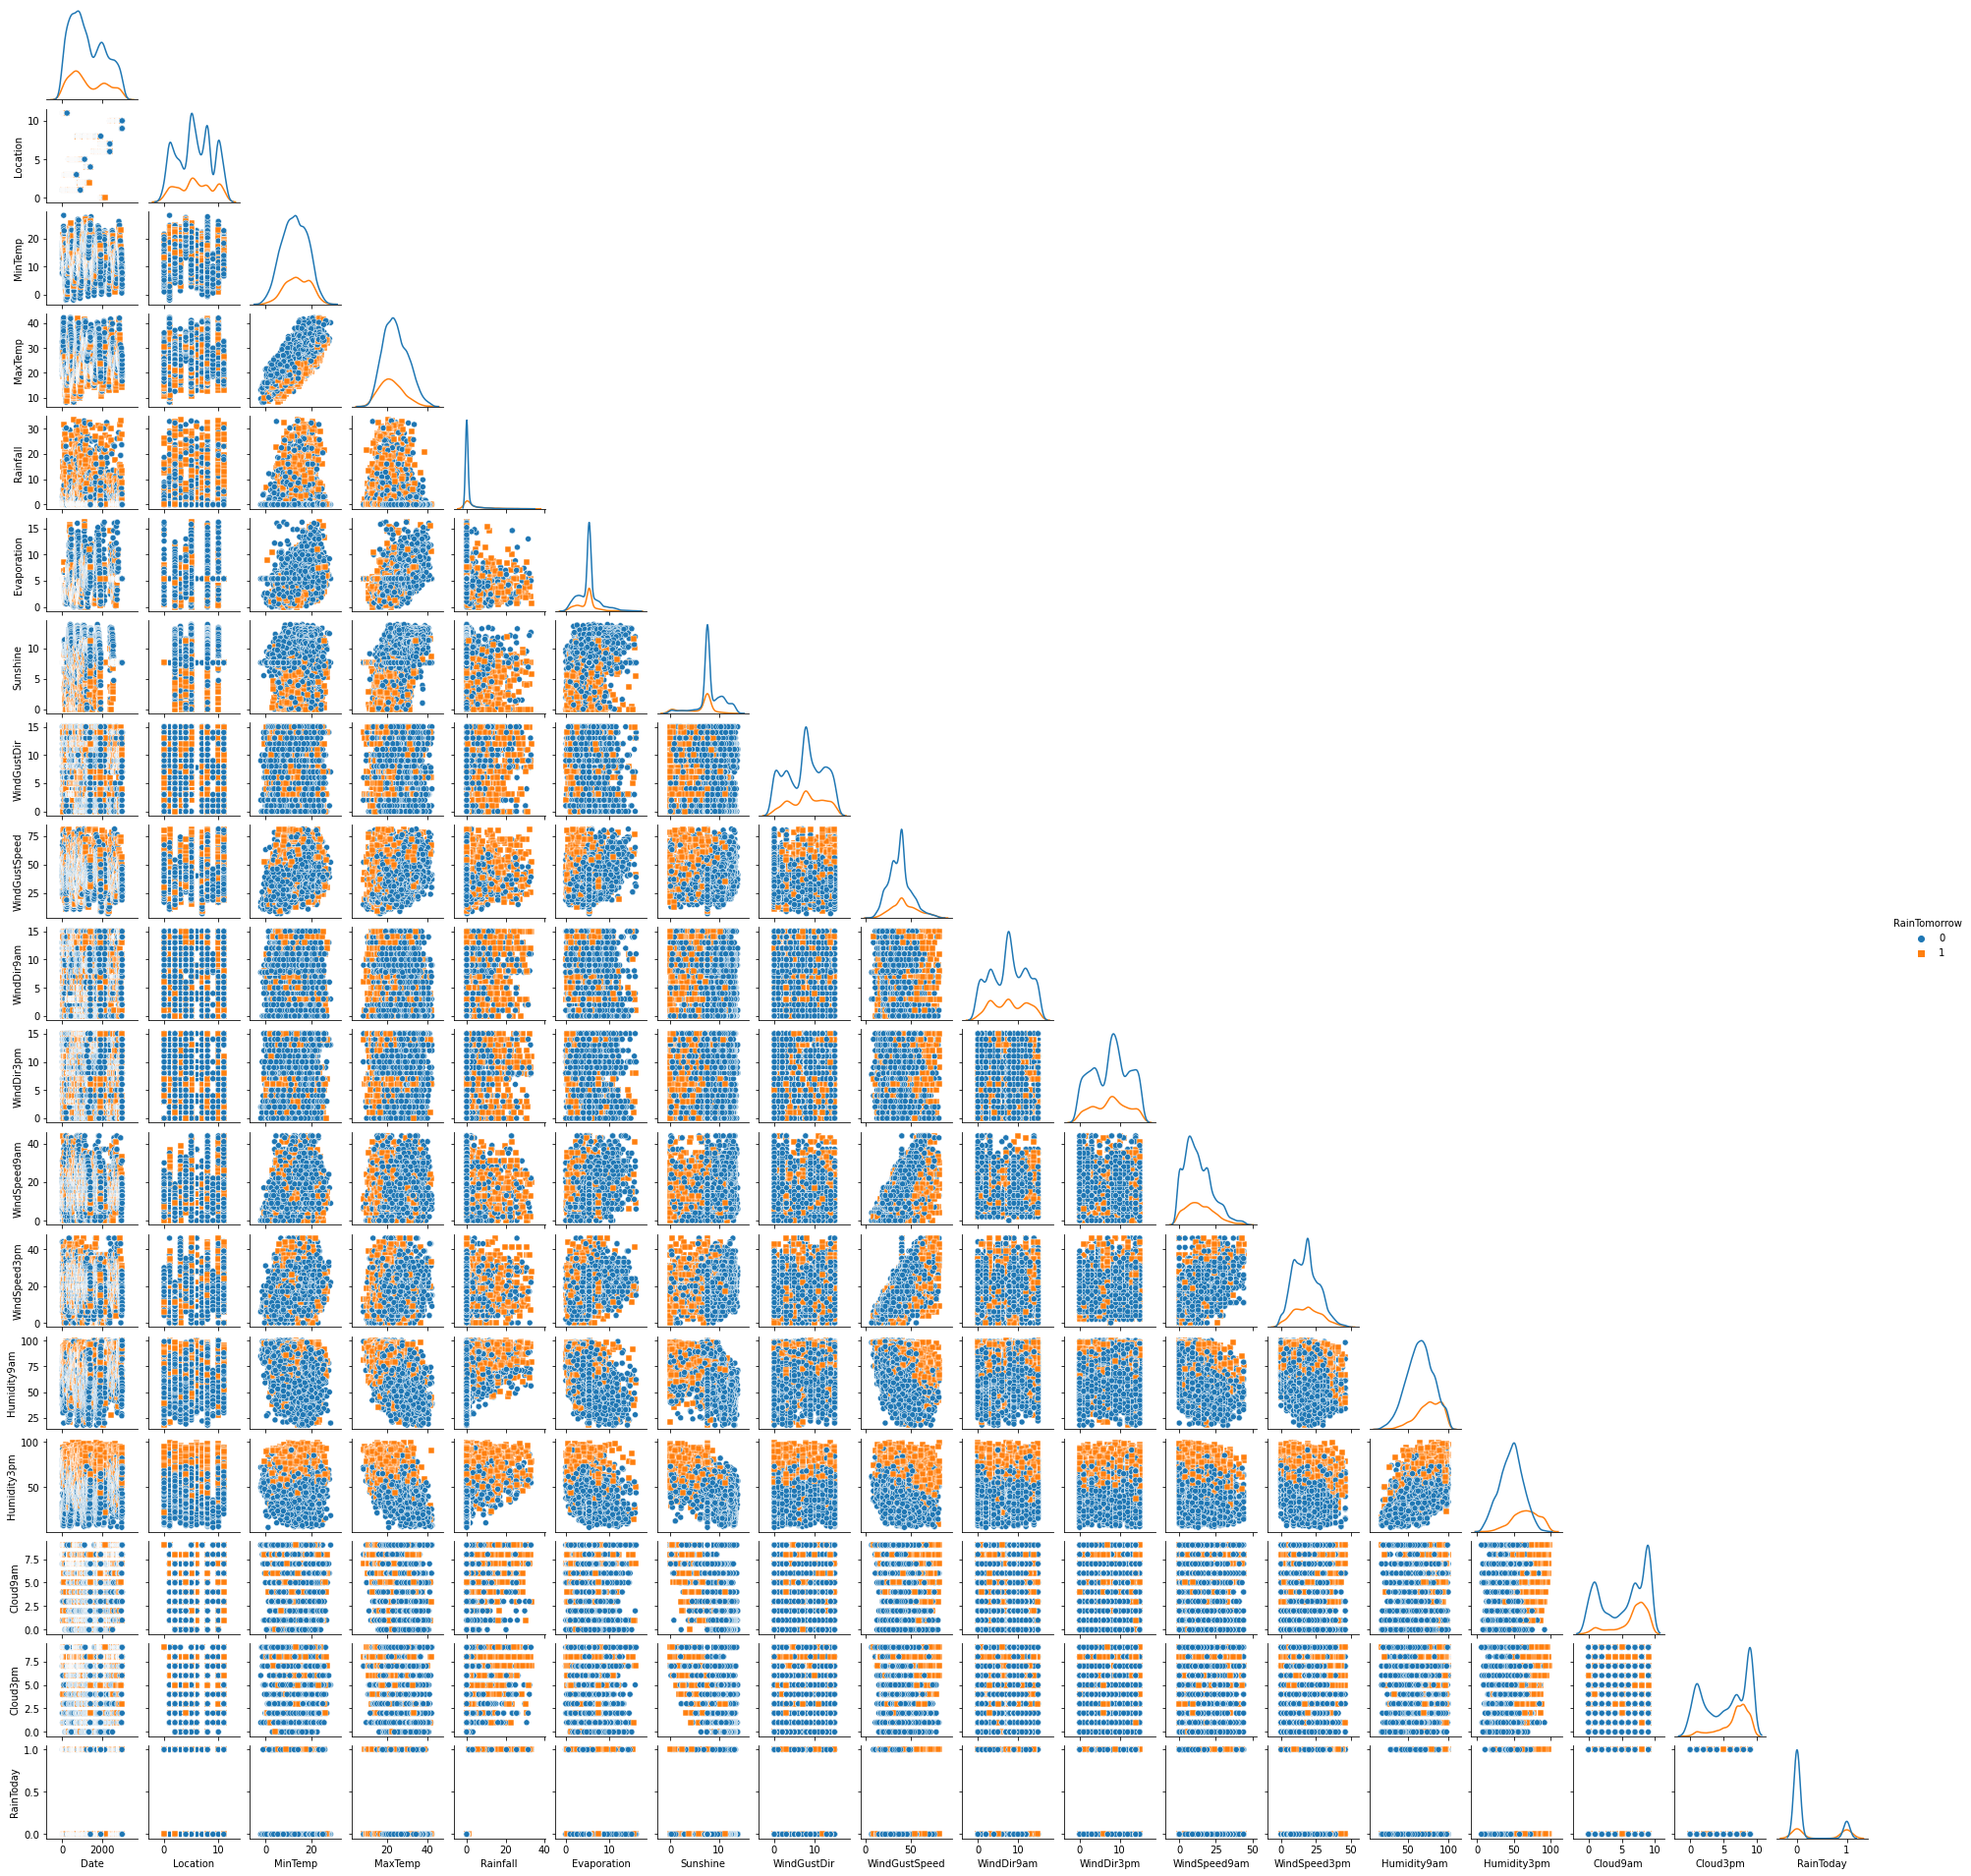

In [72]:
sn.pairplot(new_df, hue="RainTomorrow", height=1.5, markers=["o", "s"], corner=True, diag_kws=dict(fill=False))

* In the above plot we observe the best paired distribution with the Target column is MinTemp, RainFall

# Stats Heatmap

In [73]:
new_df.describe()

Date     Location      MinTemp      MaxTemp     Rainfall  \
count  7718.000000  7718.000000  7718.000000  7718.000000  7718.000000   
mean   1279.429904     5.732832    13.036084    23.775439     1.905610   
std     847.330144     3.164103     5.429625     6.032018     4.809922   
min       0.000000     0.000000    -2.000000     8.200000     0.000000   
25%     572.000000     3.000000     9.000000    19.300000     0.000000   
50%    1090.500000     6.000000    13.100000    23.200000     0.000000   
75%    1990.750000     8.000000    17.200000    27.900000     0.800000   
max    3003.000000    11.000000    28.300000    42.200000    33.400000   

       Evaporation     Sunshine  WindGustDir  WindGustSpeed   WindDir9am  \
count  7718.000000  7718.000000  7718.000000    7718.000000  7718.000000   
mean      5.152968     7.711430     7.766139      39.237888     7.713154   
std       2.307601     2.777706     4.459404      12.899587     4.353982   
min       0.000000     0.000000     0.000000       7.000000     0.000000   
25%       4.000000     7.632205     4.000000      30.000000     4.000000   
50%       5.389395     7.632205     7.780065      39.000000     7.733149   
75%       5.389395     9.000000    12.000000      46.000000    11.000000   
max      16.200000    13.900000    15.000000      81.000000    15.000000   

        WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count  7718.000000   7718.000000   7718.000000  7718.000000  7718.000000   
mean      7.766130     13.229910     17.993810    67.873751    51.171869   
std       4.414848      9.456837      9.257520    16.571817    18.117301   
min       0.000000      0.000000      0.000000    18.000000     6.000000   
25%       4.000000      6.000000     11.000000    56.250000    39.000000   
50%       8.000000     11.000000     18.533662    68.000000    51.000000   
75%      11.000000     19.000000     24.000000    80.000000    63.000000   
max      15.000000     44.000000     46.000000   100.000000    99.000000   

         Cloud9am     Cloud3pm    RainToday  RainTomorrow  
count  7718.00000  7718.000000  7718.000000   7718.000000  
mean      5.71845     5.704328     0.233091      0.229852  
std       3.17600     3.091480     0.422827      0.420765  
min       0.00000     0.000000     0.000000      0.000000  
25%       3.00000     3.000000     0.000000      0.000000  
50%       7.00000     7.000000     0.000000      0.000000  
75%       9.00000     9.000000     0.000000      0.000000  
max       9.00000     9.000000     1.000000      1.000000

<AxesSubplot:>

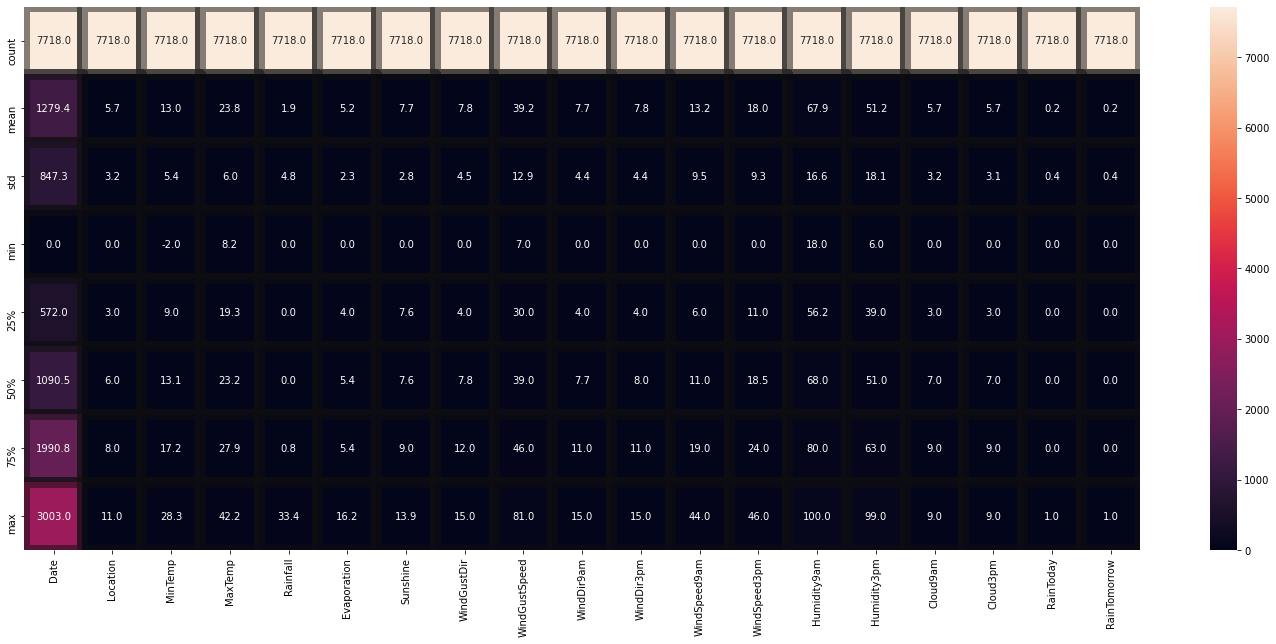

In [74]:
plt.figure(figsize=(25,10))
sn.heatmap(new_df.describe(), annot=True, linewidth=10, linecolor='#0f0f0f80', fmt='0.1f')

# Outcome of the Dataset Stats

# Total No of Rows and Columns are:
*   7043, 21



         * Date:
         mean: 1279.429904
         std: 847.330144
         min: 0.000000
         max: 3003.000000



        * Location:
         mean: 5.732832
         std: 3.164103
         min: 0.000000
         max: 11.000000
         
         
        * MinTemp:
         mean: 13.036084
         std: 5.429625
         min: -2.000000
         max: 28.300000
         
         
         * MaxTemp:
         mean: 23.775439
         std: 6.032018
         min: 8.200000
         max: 42.200000

         
         
         * Rainfall:
         mean: 0.349301
         std: 0.481634
         min: 0.000000 
         max: 1.056352
         
         
         * Evaporation:
         mean: 1.431271e
         std: 1.000065e
         min: -2.884736e
         max: 3.828932e

         
         
         * Sunshine:
         mean: 5.857980e
         std: 1.000065e
         min: -2.310724e
         max: 2.639835e

         
         
         * WindGustDir:
         mean: 7.766139
         std: 4.459404
         min: 0.000000
         max: 15.000000

         
         
         * WindGustSpeed:
         mean: 39.237888
         std: 12.899587
         min: 7.000000
         max: 81.000000
         
         
         * WindDir9am:
         mean: 7.713154
         std: 4.353982
         min: 0.000000
         max: 15.000000
         
         
         * WindDir3pm:
         mean: 7.766130
         std: 4.414848
         min: 0.000000
         max: 15.000000
         
         
         * WindSpeed9am:
         mean: 3.296504
         std: 1.537297
         min: 0.000000
         max: 6.633250
         
         
         * WindSpeed3pm:
         mean: 17.993810
         std: 9.257520
         min: 0.000000
         max: 46.000000
         
         
         * Humidity9am:
         mean: 67.873751
         std: 16.571817
         min: 18.000000
         max: 100.000000
         
         
         * Humidity3pm:
         mean: 51.171869
         std: 18.117301
         min: 6.000000
         max: 99.000000
         
         
         * Cloud9am:
         mean: 5.71845
         std: 3.17600
         min: 0.00000
         max: 9.00000
         
         
         * Cloud3pm:
         mean: 5.704328
         std: 3.091480
         min: 0.000000
         max: 9.000000
         
         * RainToday:
         mean: 0.233091
         std: 0.422827
         min: 0.000000
         max: 1.000000
         
         
         * RainTomorrow:
         mean: 0.229852
         std: 0.420765
         min: 0.000000
         max: 1.000000
         
         
        





# Correlation Heatmap

In [75]:
cor=new_df.corr()
cor

Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
Date           1.000000  0.461508 -0.001783  0.088465  0.003803     0.117338   
Location       0.461508  1.000000  0.111948  0.057363  0.017177     0.136672   
MinTemp       -0.001783  0.111948  1.000000  0.720952  0.093346     0.369877   
MaxTemp        0.088465  0.057363  0.720952  1.000000 -0.142002     0.467627   
Rainfall       0.003803  0.017177  0.093346 -0.142002  1.000000    -0.095951   
Evaporation    0.117338  0.136672  0.369877  0.467627 -0.095951     1.000000   
Sunshine       0.051757  0.047909  0.061743  0.383209 -0.170628     0.370979   
WindGustDir    0.002993 -0.021176 -0.164610 -0.243006  0.092965    -0.109551   
WindGustSpeed -0.035181  0.246888  0.236154  0.142380  0.097502     0.207142   
WindDir9am     0.004552 -0.071939 -0.092325 -0.251040  0.132180    -0.117549   
WindDir3pm    -0.007152 -0.025421 -0.150461 -0.180559  0.073851    -0.031666   
WindSpeed9am  -0.091257  0.243569  0.147263  0.016225  0.061037     0.147781   
WindSpeed3pm  -0.066119  0.233788  0.191733  0.101351  0.040936     0.115602   
Humidity9am    0.095861  0.000346 -0.133414 -0.388179  0.299183    -0.329782   
Humidity3pm   -0.035616  0.058620  0.090226 -0.410538  0.297259    -0.236268   
Cloud9am       0.074304  0.023242 -0.042579 -0.220384  0.113848    -0.076251   
Cloud3pm       0.092510  0.005740 -0.088818 -0.218538  0.087461    -0.099366   
RainToday     -0.005007  0.005582  0.066978 -0.223759  0.696005    -0.167046   
RainTomorrow   0.001847  0.010800  0.098381 -0.149709  0.281946    -0.087038   

               Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
Date           0.051757     0.002993      -0.035181    0.004552   -0.007152   
Location       0.047909    -0.021176       0.246888   -0.071939   -0.025421   
MinTemp        0.061743    -0.164610       0.236154   -0.092325   -0.150461   
MaxTemp        0.383209    -0.243006       0.142380   -0.251040   -0.180559   
Rainfall      -0.170628     0.092965       0.097502    0.132180    0.073851   
Evaporation    0.370979    -0.109551       0.207142   -0.117549   -0.031666   
Sunshine       1.000000    -0.111434       0.009683   -0.088470   -0.065413   
WindGustDir   -0.111434     1.000000       0.013277    0.399960    0.540928   
WindGustSpeed  0.009683     0.013277       1.000000   -0.132283    0.076483   
WindDir9am    -0.088470     0.399960      -0.132283    1.000000    0.257134   
WindDir3pm    -0.065413     0.540928       0.076483    0.257134    1.000000   
WindSpeed9am   0.000837    -0.038929       0.577874   -0.062343    0.046589   
WindSpeed3pm   0.047125     0.050800       0.628483   -0.036126    0.092600   
Humidity9am   -0.367065     0.061692      -0.272277    0.091555   -0.019169   
Humidity3pm   -0.436910     0.077458      -0.085556    0.152033   -0.017718   
Cloud9am      -0.445032     0.135384      -0.055378    0.106146    0.081362   
Cloud3pm      -0.447304     0.109947      -0.038536    0.080880    0.050683   
RainToday     -0.228058     0.131161       0.084296    0.160505    0.097856   
RainTomorrow  -0.334318     0.050385       0.185552    0.023241    0.002696   

               WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Cloud9am  \
Date              -0.091257     -0.066119     0.095861    -0.035616  0.074304   
Location           0.243569      0.233788     0.000346     0.058620  0.023242   
MinTemp            0.147263      0.191733    -0.133414     0.090226 -0.042579   
MaxTemp            0.016225      0.101351    -0.388179    -0.410538 -0.220384   
Rainfall           0.061037      0.040936     0.299183     0.297259  0.113848   
Evaporation        0.147781      0.115602    -0.329782    -0.236268 -0.076251   
Sunshine           0.000837      0.047125    -0.367065    -0.436910 -0.445032   
WindGustDir       -0.038929      0.050800     0.061692     0.077458  0.135384   
WindGustSpeed      0.577874      0.628483    -0.272277    -0.085556 -0.055378   
WindDir9am        -0.062343

<AxesSubplot:>

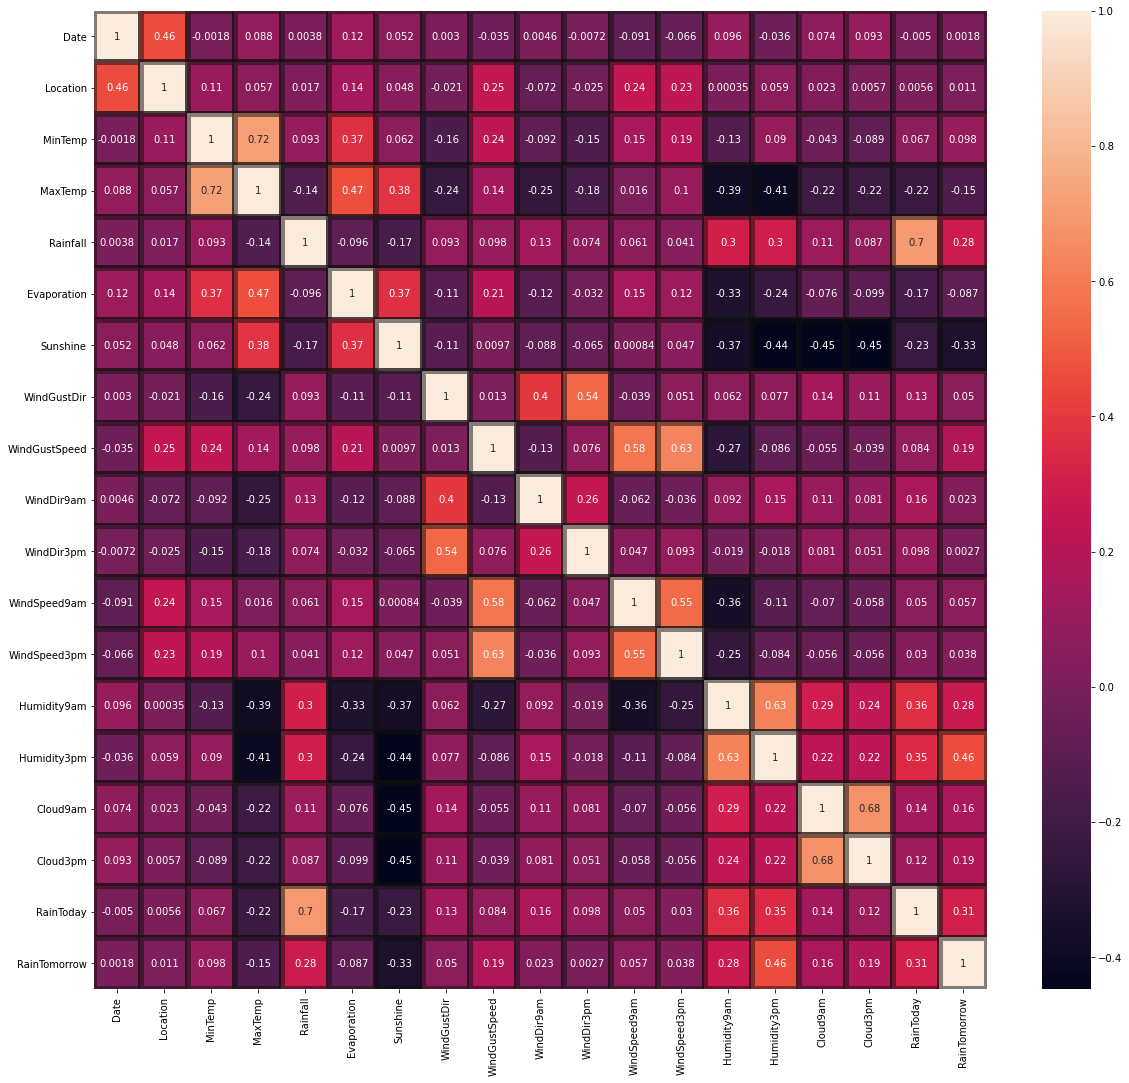

In [76]:
plt.figure(figsize=(20,18))
sn.heatmap(cor, annot=True, linewidth=5, linecolor='#0f0f0f80')

* In the above plot we observe that Humidity3pm has the best correlation with Target column

# To check the columns +ve and -ve correlated

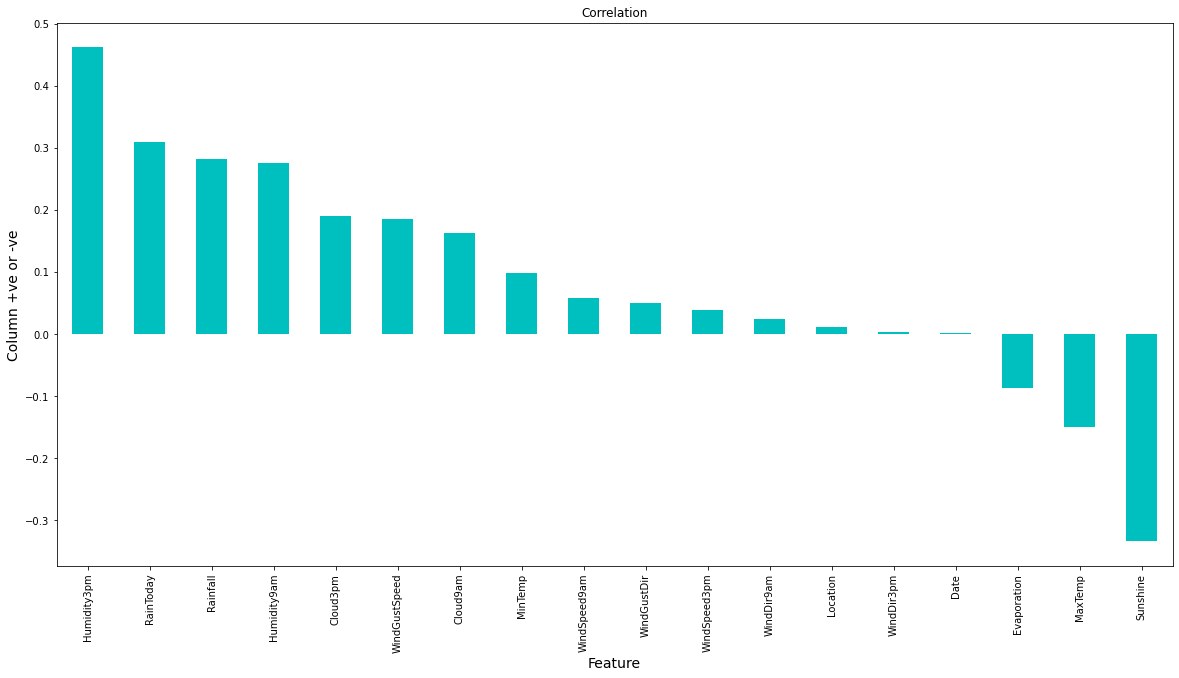

In [77]:
plt.figure(figsize=(20,10))
new_df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar', color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column +ve or -ve', fontsize=14)
plt.title('Correlation', fontsize=12)
plt.show()

* In the above plot we observe that Column ['Humidity3pm', 'Cloud3pm', 'RainToday', 'Cloud3am', 'Rainfall', 'Humidity9am', 'WindGushspeed', 'MinTemp', 'Windspeed9am', 'WindushDir', 'Windspeed3pm', 'Winddir9am', 'Location'] are +vely correlated and Columns ['Winddir3pm', 'Date', 'Evaporation', 'MaxTemp', 'Sunshine'] are -vely correlated

* Here we confirm that Humidity3pm has the best correlation with Target column

# DataPreprocessing

# Skewness check and Removal

In [78]:
new_df.skew()

Date             0.398952
Location        -0.042143
MinTemp         -0.059971
MaxTemp          0.339914
Rainfall         3.471359
Evaporation      0.854860
Sunshine        -0.724277
WindGustDir     -0.143363
WindGustSpeed    0.529697
WindDir9am      -0.044301
WindDir3pm      -0.090151
WindSpeed9am     0.716599
WindSpeed3pm     0.312887
Humidity9am     -0.228215
Humidity3pm      0.124132
Cloud9am        -0.582653
Cloud3pm        -0.504423
RainToday        1.262821
RainTomorrow     1.284412
dtype: float64

In [79]:
import scipy.stats as Stat
import matplotlib.pyplot as plt
import pylab

In [80]:
def Plotter(new_df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    new_df[feature].hist()
    plt.subplot(1,2,2)
    Stat.probplot(new_df[feature],dist='norm',plot=pylab)
    plt.show()

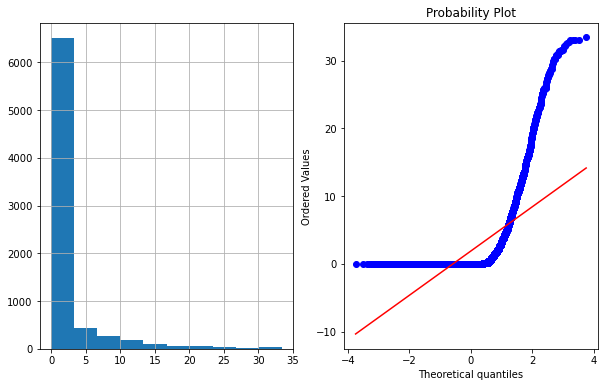

In [81]:
Plotter(new_df,'Rainfall')

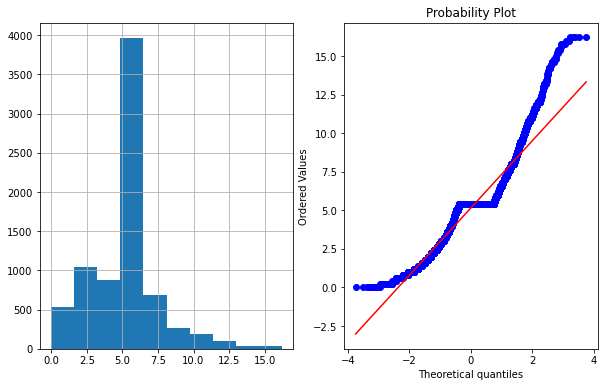

In [82]:
Plotter(new_df,'Evaporation')

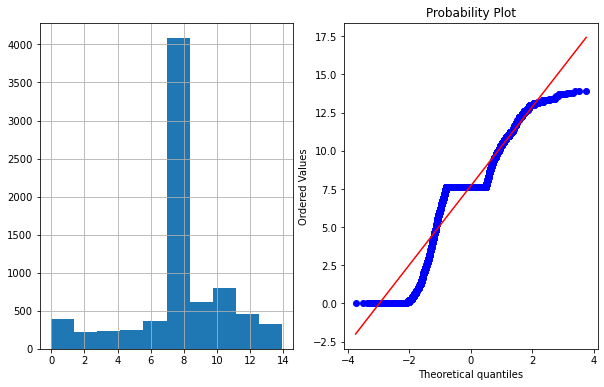

In [83]:
Plotter(new_df,'Sunshine')

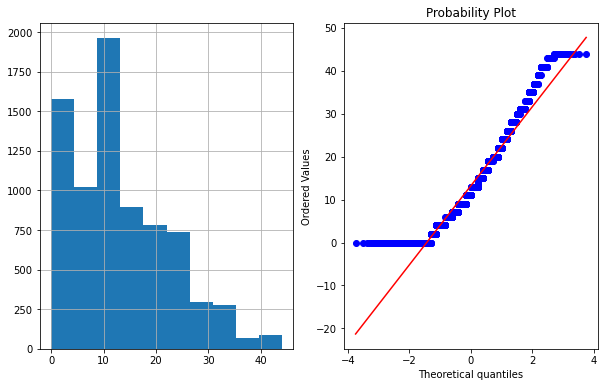

In [84]:
Plotter(new_df,'WindSpeed9am')

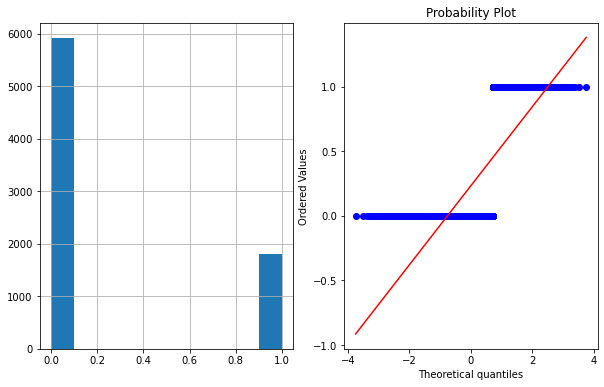

In [85]:
Plotter(new_df,'RainToday')

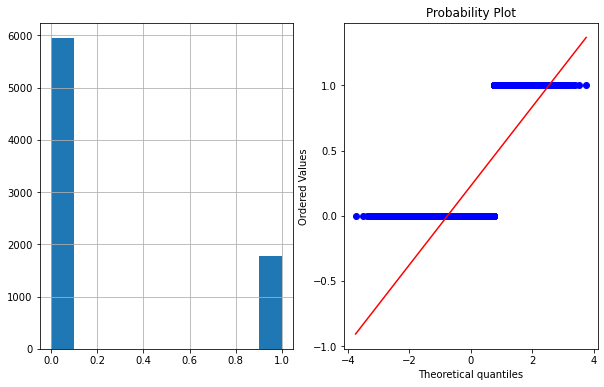

In [86]:
Plotter(new_df,'RainTomorrow')

* From the above plots we observe only Rainfall, WindSpeed9am, Sunshine, Evaporation follows a Gaussian distribution and for the rest we perform balancing technique

In [87]:
new_df.skew()

Date             0.398952
Location        -0.042143
MinTemp         -0.059971
MaxTemp          0.339914
Rainfall         3.471359
Evaporation      0.854860
Sunshine        -0.724277
WindGustDir     -0.143363
WindGustSpeed    0.529697
WindDir9am      -0.044301
WindDir3pm      -0.090151
WindSpeed9am     0.716599
WindSpeed3pm     0.312887
Humidity9am     -0.228215
Humidity3pm      0.124132
Cloud9am        -0.582653
Cloud3pm        -0.504423
RainToday        1.262821
RainTomorrow     1.284412
dtype: float64

In [88]:
new_df['WindSpeed9am'].transform([np.sqrt, np.exp, np.reciprocal, np.log])

sqrt           exp  reciprocal       log
0     4.472136  4.851652e+08    0.050000  2.995732
1     2.000000  5.459815e+01    0.250000  1.386294
2     4.358899  1.784823e+08    0.052632  2.944439
3     3.316625  5.987414e+04    0.090909  2.397895
4     2.645751  1.096633e+03    0.142857  1.945910
...        ...           ...         ...       ...
8419  3.872983  3.269017e+06    0.066667  2.708050
8420  3.605551  4.424134e+05    0.076923  2.564949
8421  3.605551  4.424134e+05    0.076923  2.564949
8422  3.000000  8.103084e+03    0.111111  2.197225
8423  3.605551  4.424134e+05    0.076923  2.564949

[7718 rows x 4 columns]

In [89]:
new_df['WindSpeed9am'] = np.sqrt(new_df['WindSpeed9am'])

In [90]:
new_df['Rainfall'].transform([np.sqrt, np.exp, np.reciprocal, np.log])

sqrt       exp  reciprocal       log
0     0.774597  1.822119    1.666667 -0.510826
1     0.000000  1.000000         inf      -inf
2     0.000000  1.000000         inf      -inf
3     0.000000  1.000000         inf      -inf
4     1.000000  2.718282    1.000000  0.000000
...        ...       ...         ...       ...
8419  0.000000  1.000000         inf      -inf
8420  0.000000  1.000000         inf      -inf
8421  0.000000  1.000000         inf      -inf
8422  0.000000  1.000000         inf      -inf
8423  0.000000  1.000000         inf      -inf

[7718 rows x 4 columns]

In [91]:
new_df['Rainfall'] = np.sqrt(new_df['Rainfall'])
new_df['Rainfall'] = np.sqrt(new_df['Rainfall'])
new_df['Rainfall'] = np.sqrt(new_df['Rainfall'])
new_df['Rainfall'] = np.sqrt(new_df['Rainfall'])
new_df['Rainfall'] = np.sqrt(new_df['Rainfall'])
new_df['Rainfall'] = np.sqrt(new_df['Rainfall'])

In [92]:
from sklearn.preprocessing import PowerTransformer

In [93]:
new_df['Evaporation']=PowerTransformer('yeo-johnson').fit_transform(new_df[['Evaporation']])

In [94]:
new_df['Sunshine']=PowerTransformer('yeo-johnson').fit_transform(new_df[['Sunshine']])

In [95]:
new_df.skew()

Date             0.398952
Location        -0.042143
MinTemp         -0.059971
MaxTemp          0.339914
Rainfall         0.655424
Evaporation      0.073163
Sunshine        -0.055448
WindGustDir     -0.143363
WindGustSpeed    0.529697
WindDir9am      -0.044301
WindDir3pm      -0.090151
WindSpeed9am    -0.505906
WindSpeed3pm     0.312887
Humidity9am     -0.228215
Humidity3pm      0.124132
Cloud9am        -0.582653
Cloud3pm        -0.504423
RainToday        1.262821
RainTomorrow     1.284412
dtype: float64

# Balancing Columns with Imbalances to avoid Bias

In [96]:
cl9 = new_df.columns.tolist()
cl9 = [col for col in cl9 if col not in ['Cloud9am']]

target1 = 'Cloud9am'

state = np.random.RandomState(42)
a = new_df[cl9]
b = new_df[target1]

a_outliers = state.uniform(low=0, high=1, size=(a.shape[0], a.shape[1]))
print(a.shape)

(7718, 18)


In [97]:
cl3 = new_df.columns.tolist()
cl3 = [col for col in cl3 if col not in ['Cloud3pm']]

target2 = 'Cloud3pm'

state = np.random.RandomState(42)
c = new_df[cl3]
d = new_df[target2]

c_outliers = state.uniform(low=0, high=1, size=(c.shape[0], c.shape[1]))
print(c.shape)

(7718, 18)


In [98]:
RT = new_df.columns.tolist()
RT = [col for col in RT if col not in ['RainToday']]

target3 = 'RainToday'

state = np.random.RandomState(42)
e = new_df[RT]
f = new_df[target3]

e_outliers = state.uniform(low=0, high=1, size=(e.shape[0], e.shape[1]))
print(e.shape)

(7718, 18)


In [99]:
RT = new_df.columns.tolist()
RT = [col for col in RT if col not in ['RainTomorrow']]

target4 = 'RainTomorrow'

state = np.random.RandomState(42)
g = new_df[RT]
h = new_df[target4]

g_outliers = state.uniform(low=0, high=1, size=(g.shape[0], g.shape[1]))
print(g.shape)

(7718, 18)


Text(0, 0.5, 'Frequency')

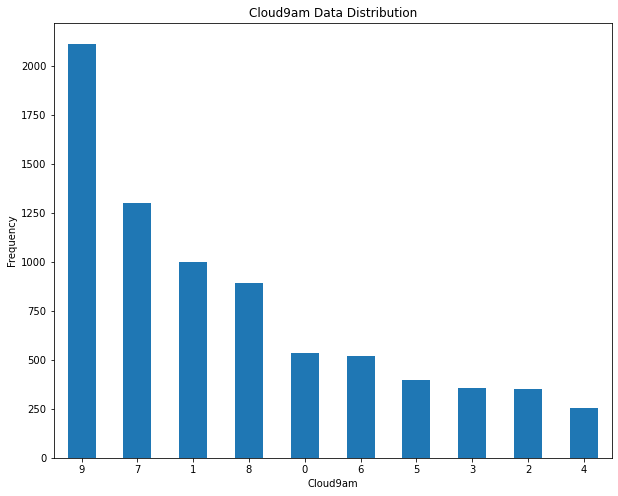

In [100]:
plt.figure(figsize=[10,8])
count_classes = pd.value_counts(new_df['Cloud9am'], sort = True)
count_classes.plot(kind='bar', rot=0)
plt.title("Cloud9am Data Distribution")


plt.xlabel("Cloud9am")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

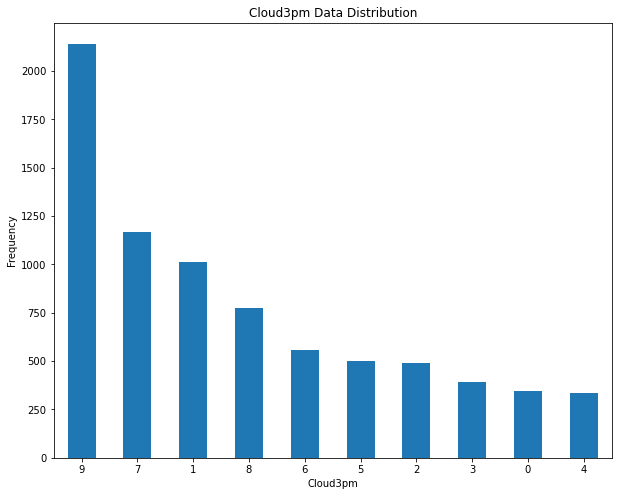

In [101]:
plt.figure(figsize=[10,8])
count_classes = pd.value_counts(new_df['Cloud3pm'], sort = True)
count_classes.plot(kind='bar', rot=0)
plt.title("Cloud3pm Data Distribution")


plt.xlabel("Cloud3pm")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

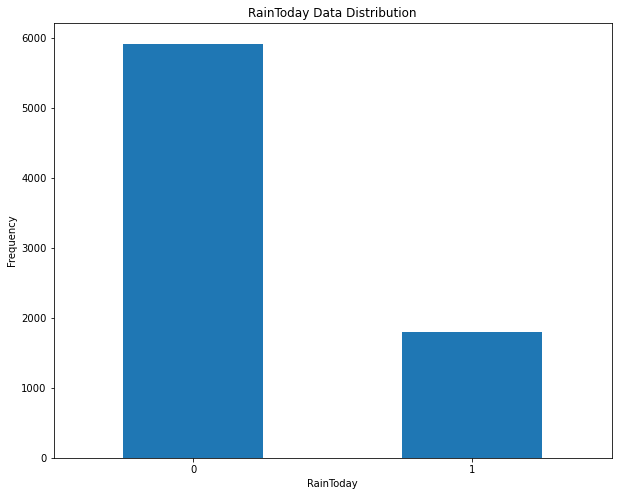

In [102]:
plt.figure(figsize=[10,8])
count_classes = pd.value_counts(new_df['RainToday'], sort = True)
count_classes.plot(kind='bar', rot=0)
plt.title("RainToday Data Distribution")


plt.xlabel("RainToday")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

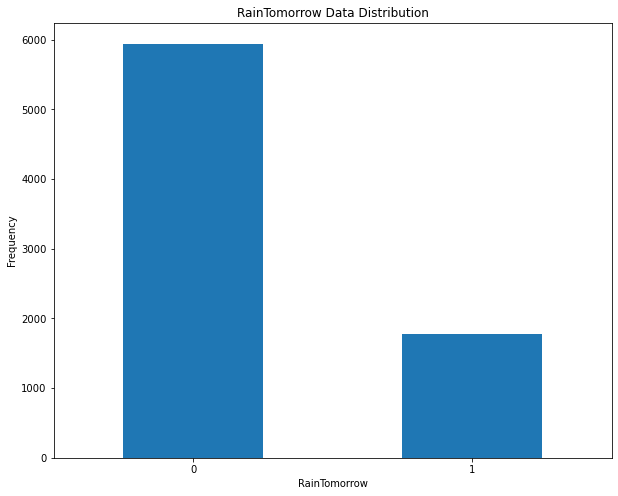

In [103]:
plt.figure(figsize=[10,8])
count_classes = pd.value_counts(new_df['RainTomorrow'], sort = True)
count_classes.plot(kind='bar', rot=0)
plt.title("RainTomorrow Data Distribution")


plt.xlabel("RainTomorrow")
plt.ylabel("Frequency")

In [104]:
NO1 = new_df[new_df['Cloud9am']==0]
NO1.shape

(536, 19)

In [105]:
NO2 = new_df[new_df['Cloud9am']==1]
NO2.shape

(1001, 19)

In [106]:
NO3 = new_df[new_df['Cloud9am']==2]
NO3.shape

(351, 19)

In [107]:
NO4 = new_df[new_df['Cloud9am']==3]
NO4.shape

(357, 19)

In [108]:
NO5 = new_df[new_df['Cloud9am']==4]
NO5.shape

(254, 19)

In [109]:
NO6 = new_df[new_df['Cloud9am']==5]
NO6.shape

(395, 19)

In [110]:
NO7 = new_df[new_df['Cloud9am']==6]
NO7.shape

(518, 19)

In [111]:
NO8 = new_df[new_df['Cloud9am']==7]
NO8.shape

(1299, 19)

In [112]:
NO9 = new_df[new_df['Cloud9am']==8]
NO9.shape

(894, 19)

In [113]:
NO10 = new_df[new_df['Cloud9am']==9]
NO10.shape

(2113, 19)

In [114]:
NO11 = new_df[new_df['Cloud3pm']==0]
NO11.shape

(343, 19)

In [115]:
NO12 = new_df[new_df['Cloud3pm']==1]
NO12.shape

(1013, 19)

In [116]:
NO13 = new_df[new_df['Cloud3pm']==2]
NO13.shape

(489, 19)

In [117]:
NO14 = new_df[new_df['Cloud3pm']==3]
NO14.shape

(394, 19)

In [118]:
NO15 = new_df[new_df['Cloud3pm']==4]
NO15.shape

(333, 19)

In [119]:
NO16 = new_df[new_df['Cloud3pm']==5]
NO16.shape

(502, 19)

In [120]:
NO17 = new_df[new_df['Cloud3pm']==6]
NO17.shape

(557, 19)

In [121]:
NO18 = new_df[new_df['Cloud3pm']==7]
NO18.shape

(1169, 19)

In [122]:
NO19 = new_df[new_df['Cloud3pm']==8]
NO19.shape

(776, 19)

In [123]:
NO20 = new_df[new_df['Cloud3pm']==9]
NO20.shape

(2142, 19)

In [124]:
NO21 = new_df[new_df['RainToday']==0]
NO21.shape

(5919, 19)

In [125]:
NO22 = new_df[new_df['RainToday']==1]
NO22.shape

(1799, 19)

In [126]:
NO23 = new_df[new_df['RainTomorrow']==0]
NO23.shape

(5944, 19)

In [127]:
NO24 = new_df[new_df['RainTomorrow']==1]
NO24.shape

(1774, 19)

In [128]:
from imblearn.over_sampling import RandomOverSampler

In [129]:
os = RandomOverSampler()

In [130]:
A_train_res, B_train_res = os.fit_resample(a, b)

In [131]:
C_train_res, D_train_res = os.fit_resample(c, d)

In [132]:
E_train_res, F_train_res = os.fit_resample(e, f)

In [133]:
G_train_res, H_train_res = os.fit_resample(g, h)

In [134]:
 from collections import Counter

In [135]:
print('Original Cloud9am dataset shape{}'.format(Counter(b)))

Original Cloud9am dataset shapeCounter({9: 2113, 7: 1299, 1: 1001, 8: 894, 0: 536, 6: 518, 5: 395, 3: 357, 2: 351, 4: 254})


In [136]:
print('Original Cloud3pm dataset shape{}'.format(Counter(d)))

Original Cloud3pm dataset shapeCounter({9: 2142, 7: 1169, 1: 1013, 8: 776, 6: 557, 5: 502, 2: 489, 3: 394, 0: 343, 4: 333})


In [137]:
print('Original RainToday dataset shape{}'.format(Counter(f)))

Original RainToday dataset shapeCounter({0: 5919, 1: 1799})


In [138]:
print('Original RainTomorrow dataset shape{}'.format(Counter(h)))

Original RainTomorrow dataset shapeCounter({0: 5944, 1: 1774})


In [139]:
print('Resampled Cloud9am dataset shape{}'.format(Counter(B_train_res)))

Resampled Cloud9am dataset shapeCounter({8: 2113, 9: 2113, 7: 2113, 1: 2113, 5: 2113, 2: 2113, 6: 2113, 3: 2113, 4: 2113, 0: 2113})


In [140]:
print('Resampled Cloud3pm dataset shape{}'.format(Counter(D_train_res)))

Resampled Cloud3pm dataset shapeCounter({9: 2142, 2: 2142, 8: 2142, 7: 2142, 1: 2142, 5: 2142, 4: 2142, 6: 2142, 3: 2142, 0: 2142})


In [141]:
print('Resampled RainToday dataset shape{}'.format(Counter(F_train_res)))

Resampled RainToday dataset shapeCounter({0: 5919, 1: 5919})


In [142]:
print('Resampled RainTomorrow dataset shape{}'.format(Counter(H_train_res)))

Resampled RainTomorrow dataset shapeCounter({0: 5944, 1: 5944})


# Scaling DataFrame

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
for col in new_df.iloc[:,:-1]:
    sc = StandardScaler()
    new_df.iloc[:,:-1][col] = sc.fit_transform(new_df.iloc[:,:-1][[col]])

# Separating the Features columns and Target Column

In [145]:
features=new_df.drop("RainTomorrow",axis=1)
target=new_df["RainTomorrow"]

# Classification Test Model 1

In [146]:
from sklearn.metrics import accuracy_score
from sklearn.metrics  import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [147]:
for i in range(0,500):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    LR.fit(features_train, target_train)
    pred_train=LR.predict(features_train)
    pred_test=LR.predict(features_test)
    print(f"At random state {i},the training accuracy is: {f1_score(target_train, pred_train, average='micro')}")
    print(f"At random state {i},the testing accuracy is: {f1_score(target_test, pred_test, average='micro')}")
    print("\n")

At random state 0,the training accuracy is: 0.8182446440912232
At random state 0,the testing accuracy is: 0.8347150259067357


At random state 1,the training accuracy is: 0.8223911541119557
At random state 1,the testing accuracy is: 0.8093264248704664


At random state 2,the training accuracy is: 0.8242916378714582
At random state 2,the testing accuracy is: 0.8145077720207254


At random state 3,the training accuracy is: 0.8177263303386316
At random state 3,the testing accuracy is: 0.8212435233160622


At random state 4,the training accuracy is: 0.8241188666205943
At random state 4,the testing accuracy is: 0.8155440414507773


At random state 5,the training accuracy is: 0.8242916378714582
At random state 5,the testing accuracy is: 0.8145077720207254


At random state 6,the training accuracy is: 0.822045611610228
At random state 6,the testing accuracy is: 0.8181347150259067


At random state 7,the training accuracy is: 0.8223911541119557
At random state 7,the testing accuracy is: 0.8170

At random state 66,the training accuracy is: 0.8227366966136835
At random state 66,the testing accuracy is: 0.8165803108808292


At random state 67,the training accuracy is: 0.823255010366275
At random state 67,the testing accuracy is: 0.8238341968911919


At random state 68,the training accuracy is: 0.8251554941257775
At random state 68,the testing accuracy is: 0.8062176165803109


At random state 69,the training accuracy is: 0.8222183828610918
At random state 69,the testing accuracy is: 0.8202072538860103


At random state 70,the training accuracy is: 0.8191085003455425
At random state 70,the testing accuracy is: 0.822279792746114


At random state 71,the training accuracy is: 0.8242916378714582
At random state 71,the testing accuracy is: 0.8103626943005181


At random state 72,the training accuracy is: 0.8223911541119557
At random state 72,the testing accuracy is: 0.8290155440414507


At random state 73,the training accuracy is: 0.8234277816171389
At random state 73,the testing accu

At random state 130,the training accuracy is: 0.8217000691085004
At random state 130,the testing accuracy is: 0.8134715025906736


At random state 131,the training accuracy is: 0.8218728403593643
At random state 131,the testing accuracy is: 0.8196891191709843


At random state 132,the training accuracy is: 0.8230822391154112
At random state 132,the testing accuracy is: 0.8196891191709843


At random state 133,the training accuracy is: 0.8222183828610918
At random state 133,the testing accuracy is: 0.8160621761658031


At random state 134,the training accuracy is: 0.8184174153420871
At random state 134,the testing accuracy is: 0.8160621761658031


At random state 135,the training accuracy is: 0.8251554941257775
At random state 135,the testing accuracy is: 0.8077720207253885


At random state 136,the training accuracy is: 0.8258465791292329
At random state 136,the testing accuracy is: 0.8139896373056995


At random state 137,the training accuracy is: 0.8206634416033172
At random state 13

At random state 195,the training accuracy is: 0.8236005528680027
At random state 195,the testing accuracy is: 0.8227979274611399


At random state 196,the training accuracy is: 0.8236005528680027
At random state 196,the testing accuracy is: 0.8124352331606217


At random state 197,the training accuracy is: 0.8249827228749136
At random state 197,the testing accuracy is: 0.8155440414507773


At random state 198,the training accuracy is: 0.8196268140981341
At random state 198,the testing accuracy is: 0.8181347150259067


At random state 199,the training accuracy is: 0.8234277816171389
At random state 199,the testing accuracy is: 0.810880829015544


At random state 200,the training accuracy is: 0.8204906703524534
At random state 200,the testing accuracy is: 0.8202072538860103


At random state 201,the training accuracy is: 0.8203178991015895
At random state 201,the testing accuracy is: 0.827979274611399


At random state 202,the training accuracy is: 0.8192812715964063
At random state 202,

At random state 259,the training accuracy is: 0.823255010366275
At random state 259,the testing accuracy is: 0.8212435233160622


At random state 260,the training accuracy is: 0.8227366966136835
At random state 260,the testing accuracy is: 0.8176165803108808


At random state 261,the training accuracy is: 0.8256738078783691
At random state 261,the testing accuracy is: 0.8067357512953368


At random state 262,the training accuracy is: 0.8222183828610918
At random state 262,the testing accuracy is: 0.8176165803108808


At random state 263,the training accuracy is: 0.8203178991015895
At random state 263,the testing accuracy is: 0.822279792746114


At random state 264,the training accuracy is: 0.8234277816171389
At random state 264,the testing accuracy is: 0.8072538860103627


At random state 265,the training accuracy is: 0.8248099516240498
At random state 265,the testing accuracy is: 0.8145077720207254


At random state 266,the training accuracy is: 0.8234277816171389
At random state 266,

At random state 323,the training accuracy is: 0.8225639253628196
At random state 323,the testing accuracy is: 0.8207253886010363


At random state 324,the training accuracy is: 0.8218728403593643
At random state 324,the testing accuracy is: 0.8077720207253885


At random state 325,the training accuracy is: 0.8230822391154112
At random state 325,the testing accuracy is: 0.8119170984455959


At random state 326,the training accuracy is: 0.8180718728403593
At random state 326,the testing accuracy is: 0.8238341968911919


At random state 327,the training accuracy is: 0.8184174153420871
At random state 327,the testing accuracy is: 0.8207253886010363


At random state 328,the training accuracy is: 0.8258465791292329
At random state 328,the testing accuracy is: 0.8145077720207254


At random state 329,the training accuracy is: 0.8187629578438148
At random state 329,the testing accuracy is: 0.8331606217616581


At random state 330,the training accuracy is: 0.8261921216309605
At random state 33

At random state 386,the training accuracy is: 0.8151347615756738
At random state 386,the testing accuracy is: 0.8233160621761658


At random state 387,the training accuracy is: 0.8180718728403593
At random state 387,the testing accuracy is: 0.8253886010362694


At random state 388,the training accuracy is: 0.8211817553559088
At random state 388,the testing accuracy is: 0.8165803108808292


At random state 389,the training accuracy is: 0.8173807878369039
At random state 389,the testing accuracy is: 0.8264248704663213


At random state 390,the training accuracy is: 0.8175535590877678
At random state 390,the testing accuracy is: 0.833678756476684


At random state 391,the training accuracy is: 0.8248099516240498
At random state 391,the testing accuracy is: 0.8098445595854922


At random state 392,the training accuracy is: 0.8210089841050449
At random state 392,the testing accuracy is: 0.8300518134715026


At random state 393,the training accuracy is: 0.824464409122322
At random state 393,

At random state 449,the training accuracy is: 0.8197995853489979
At random state 449,the testing accuracy is: 0.8243523316062176


At random state 450,the training accuracy is: 0.8189357290946786
At random state 450,the testing accuracy is: 0.827979274611399


At random state 451,the training accuracy is: 0.8144436765722183
At random state 451,the testing accuracy is: 0.821761658031088


At random state 452,the training accuracy is: 0.8239460953697305
At random state 452,the testing accuracy is: 0.8139896373056995


At random state 453,the training accuracy is: 0.8206634416033172
At random state 453,the testing accuracy is: 0.8253886010362694


At random state 454,the training accuracy is: 0.8206634416033172
At random state 454,the testing accuracy is: 0.8233160621761658


At random state 455,the training accuracy is: 0.8204906703524534
At random state 455,the testing accuracy is: 0.8191709844559586


At random state 456,the training accuracy is: 0.8260193503800968
At random state 456,

In [148]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=9)

In [149]:
LR.fit(features_train, target_train)

LogisticRegression()

In [150]:
pred_test=LR.predict(features_test)

In [151]:
accuracy_score(target_test, pred_test)

0.8248704663212435

# Here we observe that we get : 82% accuracy for this model

In [152]:
f1_score(target_test, pred_test, average='micro')

0.8248704663212435

# Here we confirm that this model gives : 82% accuracy assuming average as micro argument

# Cross-Validation the Model 1

In [153]:
from sklearn.model_selection import cross_val_score

In [154]:
lin_score = cross_val_score(LR,features,target,cv=5, scoring='neg_mean_absolute_error')
lin_score_n = -lin_score
lin_score_n

array([0.15738342, 0.20595855, 0.32512953, 0.19961115, 0.16202203])

In [155]:
np.mean(lin_score_n)

0.21002093694068819

In [156]:
cross_val_score(LR,features,target,cv=5).mean()

0.7899790630593118

# Here we find the mean_score is at : 0.7899790630593118 % which is < 5% and cross val score is at 79 % which is good for our model

# Classification Test Model 2

In [157]:
from sklearn.metrics import accuracy_score
from sklearn.metrics  import f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
SVC=SVC()

In [158]:
for i in range(0,100):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    SVC.fit(features_train, target_train)
    pred_train=SVC.predict(features_train)
    pred_test=SVC.predict(features_test)
    print(f"At random state {i},the training accuracy is: {f1_score(target_train, pred_train, average='micro')}")
    print(f"At random state {i},the testing accuracy is: {f1_score(target_test, pred_test, average='micro')}")
    print("\n")

At random state 0,the training accuracy is: 0.7657221838286109
At random state 0,the testing accuracy is: 0.783419689119171


At random state 1,the training accuracy is: 0.7714236351071182
At random state 1,the testing accuracy is: 0.7663212435233161


At random state 2,the training accuracy is: 0.769177608845888
At random state 2,the testing accuracy is: 0.7730569948186529


At random state 3,the training accuracy is: 0.7712508638562544
At random state 3,the testing accuracy is: 0.7668393782383419


At random state 4,the training accuracy is: 0.7709053213545266
At random state 4,the testing accuracy is: 0.7678756476683938


At random state 5,the training accuracy is: 0.7747062888735314
At random state 5,the testing accuracy is: 0.7564766839378239


At random state 6,the training accuracy is: 0.7702142363510712
At random state 6,the testing accuracy is: 0.7699481865284974


At random state 7,the training accuracy is: 0.7667588113337941
At random state 7,the testing accuracy is: 0.78031

At random state 64,the training accuracy is: 0.7719419488597099
At random state 64,the testing accuracy is: 0.7647668393782383


At random state 65,the training accuracy is: 0.7721147201105736
At random state 65,the testing accuracy is: 0.7642487046632124


At random state 66,the training accuracy is: 0.7715964063579819
At random state 66,the testing accuracy is: 0.7658031088082902


At random state 67,the training accuracy is: 0.7719419488597099
At random state 67,the testing accuracy is: 0.7647668393782383


At random state 68,the training accuracy is: 0.7729785763648929
At random state 68,the testing accuracy is: 0.7616580310880829


At random state 69,the training accuracy is: 0.7677954388389772
At random state 69,the testing accuracy is: 0.7772020725388601


At random state 70,the training accuracy is: 0.7695231513476157
At random state 70,the testing accuracy is: 0.7720207253886011


At random state 71,the training accuracy is: 0.7729785763648929
At random state 71,the testing ac

In [159]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=9)

In [160]:
SVC.fit(features_train, target_train)

SVC()

In [161]:
pred_test=SVC.predict(features_test)

In [162]:
accuracy_score(target_test, pred_test)

0.7751295336787565

# Here we observe that we get : 77% accuracy for this model

In [163]:
f1_score(target_test, pred_test, average='micro')

0.7751295336787566

# Here we confirm that this model gives : 77% accuracy assuming average as micro argument

# Cross-Validation the Model 2

In [164]:
from sklearn.model_selection import cross_val_score

In [165]:
lin_score = cross_val_score(SVC,features,target,cv=5, scoring='neg_mean_absolute_error')
lin_score_n = -lin_score
lin_score_n

array([0.22992228, 0.22992228, 0.22992228, 0.2294232 , 0.23007129])

In [166]:
np.mean(lin_score_n)

0.2298522661258097

In [167]:
cross_val_score(SVC,features,target,cv=5).mean()

0.7701477338741902

# Here we find the mean_score is at : 0.2298522661258097 % which is < 5% and cross val score is at 77% which is good for our model

# Classification Test Model 3

In [168]:
from sklearn.metrics import accuracy_score
from sklearn.metrics  import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
DTC=GradientBoostingClassifier()

In [169]:
for i in range(0,100):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    DTC.fit(features_train, target_train)
    pred_train=DTC.predict(features_train)
    pred_test=DTC.predict(features_test)
    print(f"At random state {i},the training accuracy is: {f1_score(target_train, pred_train, average='micro')}")
    print(f"At random state {i},the testing accuracy is: {f1_score(target_test, pred_test, average='micro')}")
    print("\n")

At random state 0,the training accuracy is: 0.8778507256392536
At random state 0,the testing accuracy is: 0.8683937823834197


At random state 1,the training accuracy is: 0.8787145818935729
At random state 1,the testing accuracy is: 0.8507772020725388


At random state 2,the training accuracy is: 0.8766413268832066
At random state 2,the testing accuracy is: 0.8528497409326425


At random state 3,the training accuracy is: 0.8799239806496199
At random state 3,the testing accuracy is: 0.8580310880829015


At random state 4,the training accuracy is: 0.8813061506565307
At random state 4,the testing accuracy is: 0.8492227979274611


At random state 5,the training accuracy is: 0.8813061506565307
At random state 5,the testing accuracy is: 0.8461139896373057


At random state 6,the training accuracy is: 0.8781962681409814
At random state 6,the testing accuracy is: 0.8523316062176166


At random state 7,the training accuracy is: 0.8776779543883898
At random state 7,the testing accuracy is: 0.852

At random state 64,the training accuracy is: 0.8795784381478922
At random state 64,the testing accuracy is: 0.8544041450777202


At random state 65,the training accuracy is: 0.8818244644091223
At random state 65,the testing accuracy is: 0.8580310880829015


At random state 66,the training accuracy is: 0.8762957843814789
At random state 66,the testing accuracy is: 0.8523316062176166


At random state 67,the training accuracy is: 0.8795784381478922
At random state 67,the testing accuracy is: 0.8533678756476684


At random state 68,the training accuracy is: 0.8804422944022114
At random state 68,the testing accuracy is: 0.844041450777202


At random state 69,the training accuracy is: 0.8735314443676572
At random state 69,the testing accuracy is: 0.8616580310880829


At random state 70,the training accuracy is: 0.8757774706288872
At random state 70,the testing accuracy is: 0.855440414507772


At random state 71,the training accuracy is: 0.8799239806496199
At random state 71,the testing accu

In [170]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=9)

In [171]:
DTC.fit(features_train, target_train)

GradientBoostingClassifier()

In [172]:
pred_test=DTC.predict(features_test)

In [173]:
accuracy_score(target_test, pred_test)

0.8699481865284974

# Here we observe that we get : 86% accuracy for this model

In [174]:
f1_score(target_test, pred_test, average='micro')

0.8699481865284974

# Here we confirm that this model gives : 86% accuracy assuming average as micro argument

# Cross-Validation the Model 3

In [175]:
from sklearn.model_selection import cross_val_score

In [176]:
lin_score = cross_val_score(DTC,features,target,cv=5, scoring='neg_mean_absolute_error')
lin_score_n = -lin_score
lin_score_n

array([0.15738342, 0.18976684, 0.22085492, 0.37913156, 0.15683733])

In [177]:
np.mean(lin_score_n)

0.22079481462328618

In [178]:
cross_val_score(DTC,features,target,cv=5).mean()

0.7797234879902216

# Here we find the mean_score is at : 0.22079481462328618 % which is < 5% and cross val score is at 77% which is good for our model

# Classification Test Model 4

In [179]:
from sklearn.metrics import accuracy_score
from sklearn.metrics  import f1_score
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
NB=XGBClassifier()

In [180]:
for i in range(0,100):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    NB.fit(features_train, target_train)
    pred_train=NB.predict(features_train)
    pred_test=NB.predict(features_test)
    print(f"At random state {i},the training accuracy is: {f1_score(target_train, pred_train, average='micro')}")
    print(f"At random state {i},the testing accuracy is: {f1_score(target_test, pred_test, average='micro')}")
    print("\n")

[23:21:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At random state 0,the training accuracy is: 0.9944713199723566
At random state 0,the testing accuracy is: 0.8927461139896373


[23:21:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At random state 1,the training accuracy is: 0.9941257774706289
At random state 1,the testing accuracy is: 0.8782383419689119


[23:21:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.

At random state 19,the training accuracy is: 0.9953351762266759
At random state 19,the testing accuracy is: 0.8968911917098447


[23:21:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At random state 20,the training accuracy is: 0.9941257774706289
At random state 20,the testing accuracy is: 0.8875647668393782


[23:21:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At random state 21,the training accuracy is: 0.993953006219765
At random state 21,the testing accuracy is: 0.8932642487046

At random state 38,the training accuracy is: 0.9930891499654457
At random state 38,the testing accuracy is: 0.9


[23:22:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At random state 39,the training accuracy is: 0.9936074637180373
At random state 39,the testing accuracy is: 0.8891191709844558


[23:22:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At random state 40,the training accuracy is: 0.9941257774706289
At random state 40,the testing accuracy is: 0.8953367875647669


[23:22:0

At random state 57,the training accuracy is: 0.9936074637180373
At random state 57,the testing accuracy is: 0.8922279792746114


[23:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At random state 58,the training accuracy is: 0.9960262612301313
At random state 58,the testing accuracy is: 0.8849740932642487


[23:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At random state 59,the training accuracy is: 0.9948168624740843
At random state 59,the testing accuracy is: 0.881347150259

At random state 76,the training accuracy is: 0.9941257774706289
At random state 76,the testing accuracy is: 0.8823834196891192


[23:22:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At random state 77,the training accuracy is: 0.997581202487906
At random state 77,the testing accuracy is: 0.8963730569948186


[23:22:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At random state 78,the training accuracy is: 0.9958534899792675
At random state 78,the testing accuracy is: 0.8854922279792

At random state 95,the training accuracy is: 0.9941257774706289
At random state 95,the testing accuracy is: 0.8994818652849741


[23:22:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At random state 96,the training accuracy is: 0.9904975812024879
At random state 96,the testing accuracy is: 0.8968911917098447


[23:22:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At random state 97,the training accuracy is: 0.993953006219765
At random state 97,the testing accuracy is: 0.8891191709844

In [181]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=9)

In [182]:
NB.fit(features_train, target_train)

[23:22:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [183]:
pred_test=NB.predict(features_test)

In [184]:
accuracy_score(target_test, pred_test)

0.9025906735751296

# Here we observe that we get : 90% accuracy for this model

In [185]:
f1_score(target_test, pred_test, average='micro')

0.9025906735751296

# Here we confirm that this model gives : 90% accuracy assuming average as micro argument

# Cross-Validation the Model 4

In [186]:
from sklearn.model_selection import cross_val_score

In [187]:
lin_score = cross_val_score(NB,features,target,cv=5, scoring='neg_mean_absolute_error')
lin_score_n = -lin_score
lin_score_n

[23:22:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.17227979, 0.15608808, 0.20401554, 0.31237848, 0.15618924])

In [188]:
np.mean(lin_score_n)

0.2001902289799496

In [189]:
cross_val_score(NB,features,target,cv=5).mean()

[23:22:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.7998097710200505

# Here we find the mean_score is at : 0.2001902289799496 % which is < 5% and cross val score is at 79% which is good for our model

# Classification Test Model 5

In [190]:
from sklearn.metrics import accuracy_score
from sklearn.metrics  import f1_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
LGBM=LGBMClassifier()

In [191]:
for i in range(0,100):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    LGBM.fit(features_train, target_train)
    pred_train=LGBM.predict(features_train)
    pred_test=LGBM.predict(features_test)
    print(f"At random state {i},the training accuracy is: {f1_score(target_train, pred_train, average='micro')}")
    print(f"At random state {i},the testing accuracy is: {f1_score(target_test, pred_test, average='micro')}")
    print("\n")

At random state 0,the training accuracy is: 0.9597442985487215
At random state 0,the testing accuracy is: 0.8875647668393782


At random state 1,the training accuracy is: 0.9638908085694541
At random state 1,the testing accuracy is: 0.8777202072538861


At random state 2,the training accuracy is: 0.9619903248099516
At random state 2,the testing accuracy is: 0.8829015544041451


At random state 3,the training accuracy is: 0.9599170697995854
At random state 3,the testing accuracy is: 0.8740932642487047


At random state 4,the training accuracy is: 0.9625086385625432
At random state 4,the testing accuracy is: 0.8777202072538861


At random state 5,the training accuracy is: 0.9625086385625432
At random state 5,the testing accuracy is: 0.8694300518134715


At random state 6,the training accuracy is: 0.9623358673116793
At random state 6,the testing accuracy is: 0.8766839378238344


At random state 7,the training accuracy is: 0.9600898410504493
At random state 7,the testing accuracy is: 0.870

At random state 64,the training accuracy is: 0.9612992398064962
At random state 64,the testing accuracy is: 0.872020725388601


At random state 65,the training accuracy is: 0.9593987560469938
At random state 65,the testing accuracy is: 0.8813471502590674


At random state 66,the training accuracy is: 0.9593987560469938
At random state 66,the testing accuracy is: 0.8704663212435233


At random state 67,the training accuracy is: 0.9588804422944022
At random state 67,the testing accuracy is: 0.8683937823834197


At random state 68,the training accuracy is: 0.9630269523151348
At random state 68,the testing accuracy is: 0.8792746113989637


At random state 69,the training accuracy is: 0.9612992398064962
At random state 69,the testing accuracy is: 0.8844559585492228


At random state 70,the training accuracy is: 0.9590532135452661
At random state 70,the testing accuracy is: 0.8860103626943006


At random state 71,the training accuracy is: 0.9609536973047685
At random state 71,the testing acc

In [192]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=9)

In [193]:
LGBM.fit(features_train, target_train)

LGBMClassifier()

In [194]:
pred_test=LGBM.predict(features_test)

In [195]:
accuracy_score(target_test, pred_test)

0.8906735751295337

# Here we observe that we get : 89% accuracy for this model

In [196]:
f1_score(target_test, pred_test, average='micro')

0.8906735751295337

# Here we confirm that this model gives : 89% accuracy assuming average as micro argument

# Cross-Validation the Model 5

In [197]:
from sklearn.model_selection import cross_val_score

In [198]:
lin_score = cross_val_score(LGBM,features,target,cv=5, scoring='neg_mean_absolute_error')
lin_score_n = -lin_score
lin_score_n

array([0.16062176, 0.16774611, 0.19365285, 0.28386261, 0.1529488 ])

In [199]:
np.mean(lin_score_n)

0.19176642634797295

In [200]:
cross_val_score(LGBM,features,target,cv=5).mean()

0.8082335736520271

# Here we find the mean_score is at : 0.19176642634797295 % which is < 5% and cross val score is at 80% which is good for our model

# AUC-ROC

In [201]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [202]:
print(roc_auc_score(target_test,LGBM.predict(features_test)))
print(roc_auc_score(target_test,NB.predict(features_test)))

0.8035298430222528
0.8357524828113064


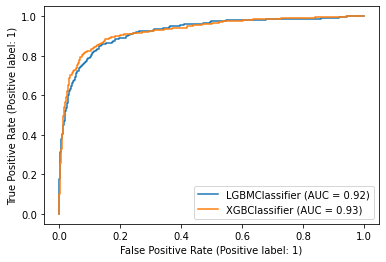

In [203]:
disp = plot_roc_curve(LGBM,features_test,target_test)
plot_roc_curve(NB,features_test,target_test,ax=disp.ax_)

# Here we choose Classification Model 4 for Hyper Parameter Tuning, Because of XGB classifier having more accuracy score and AUC score and mean_score

In [204]:
NB.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'enable_categorical', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

# Hyper Parameter Tuning

In [205]:
from sklearn.model_selection import GridSearchCV

In [206]:
Parameters  = {'objective': ['reg:logistic'],
'base_score': [0.24],
'booster': ['gbtree'],
'colsample_bylevel': [0.5],
'colsample_bynode': [0.5],   
'colsample_bytree': [0.9],
'min_child_weight': [0.08],
'num_parallel_tree': [1],
'scale_pos_weight': [1],
'subsample': [1],
'predictor': ['cpu_predictor'],
'learning_rate': [0.9],
'gamma': [0.1],
'max_delta_step': [0.11],
'max_depth': [9],
'reg_lambda': [4],
'tree_method': ['hist'],
'reg_alpha': [0.05]}

In [207]:
GCV = GridSearchCV(XGBClassifier(random_state=9),Parameters,cv=5,verbose=0,n_jobs=-1)

In [208]:
GCV.fit(features_train,target_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                         'colsample_bylevel': [0.5], 'colsample_bynode': [0.5],
                         'colsample_bytree': [0.9], 'gamma': [0.1],
                         'learning_rate': [0.9], 'max_delta_step': [0.11],
                         'max_depth': [9], 'min_child_weight'

In [209]:
PP = GCV.predict(features_test)

In [210]:
Final_scoreACC = accuracy_score(target_test, PP)

In [211]:
Final_scoreF1 = f1_score(target_test, PP, average='micro')

In [212]:
Final_scoreACC

0.9119170984455959

In [213]:
Final_scoreF1

0.9119170984455959

In [214]:
0.9119170984455959-0.9025906735751296

0.00932642487046631

# Here we are able to achieve a least amount of increase from 90% to 91% and the differnce is 0.00932642487046631

# Confusion Matrix of the selected Model 4

In [215]:
from sklearn.metrics import confusion_matrix

In [216]:
target_predict = NB.predict(features_test)

In [217]:
CM = confusion_matrix(target_test, target_predict)

In [218]:
CM

array([[1432,   64],
       [ 124,  310]], dtype=int64)

<AxesSubplot:>

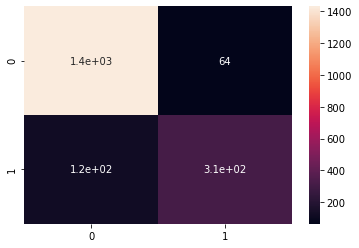

In [219]:
sn.heatmap(CM, annot=True)

* on the Actual values side 0 1432 has been predicted correctly

* on the Actual values side 1 310 has been predicted correctly

* on the Predicted values side 0 124 has been not predicted correctly

* on the Predicted values side 1 64 has been not predicted correctly

# Model saving

In [220]:
import pickle
filename = 'RainFall.pkl'
pickle.dump(Final_scoreACC, open(filename, 'wb'))

# Conclusion

In [221]:
import numpy as np
a = np.array(target_test)
predicted = np.array(GCV.predict(features_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index = range(len(a)))
df_conclusion

Original  Predicted
0            0          0
1            0          0
2            0          0
3            1          1
4            0          0
...        ...        ...
1925         0          0
1926         0          0
1927         0          0
1928         0          0
1929         0          0

[1930 rows x 2 columns]